# Introduction to Graphs

image.png

image.png

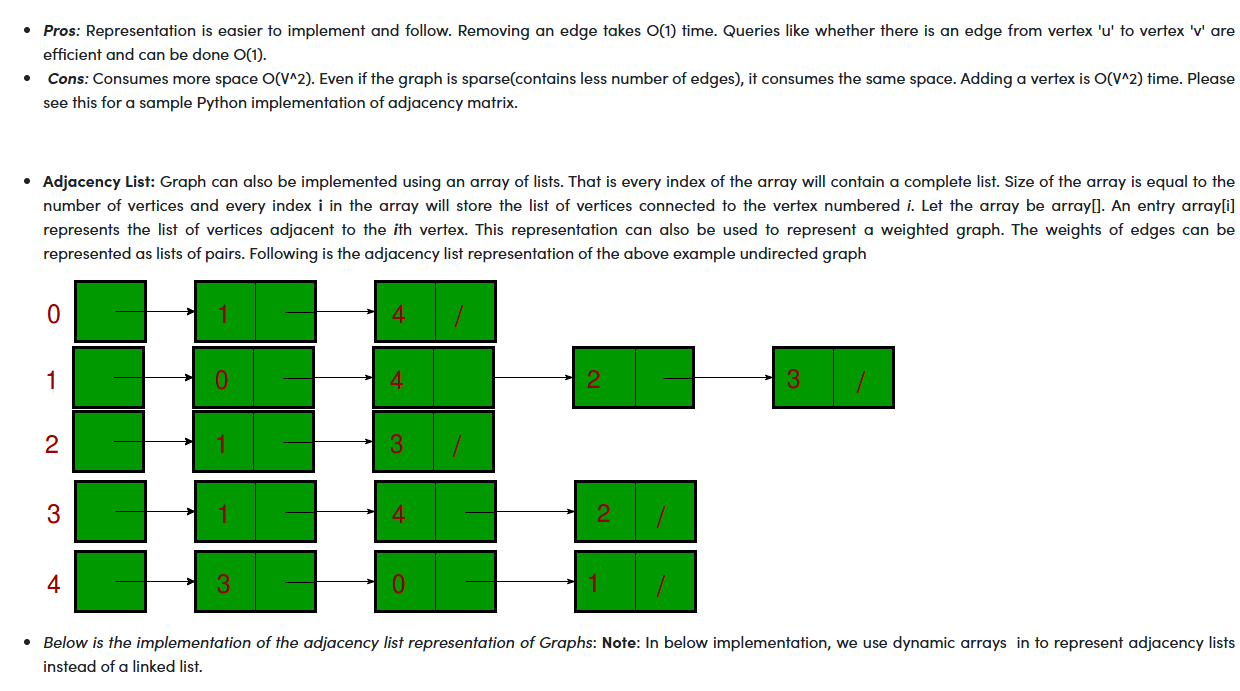

In [1]:
"""
A Python program to demonstrate the adjacency
list representation of the graph
"""

# A class to represent the adjacency list of the node


class AdjNode:
	def __init__(self, data):
		self.vertex = data
		self.next = None


# A class to represent a graph. A graph
# is the list of the adjacency lists.
# Size of the array will be the no. of the
# vertices "V"
class Graph:
	def __init__(self, vertices):
		self.V = vertices
		self.graph = [None] * self.V

	# Function to add an edge in an undirected graph
	def add_edge(self, src, dest):
		# Adding the node to the source node
		node = AdjNode(dest)
		node.next = self.graph[src]
		self.graph[src] = node

		# Adding the source node to the destination as
		# it is the undirected graph
		node = AdjNode(src)
		node.next = self.graph[dest]
		self.graph[dest] = node

	# Function to print the graph
	def print_graph(self):
		for i in range(self.V):
			print("Adjacency list of vertex {}\n head".format(i), end="")
			temp = self.graph[i]
			while temp:
				print(" -> {}".format(temp.vertex), end="")
				temp = temp.next
			print(" \n")


# Driver program to the above graph class
if __name__ == "__main__":
	V = 5
	graph = Graph(V)
	graph.add_edge(0, 1)
	graph.add_edge(0, 4)
	graph.add_edge(1, 2)
	graph.add_edge(1, 3)
	graph.add_edge(1, 4)
	graph.add_edge(2, 3)
	graph.add_edge(3, 4)

	graph.print_graph()

Adjacency list of vertex 0
 head -> 4 -> 1 

Adjacency list of vertex 1
 head -> 4 -> 3 -> 2 -> 0 

Adjacency list of vertex 2
 head -> 3 -> 1 

Adjacency list of vertex 3
 head -> 4 -> 2 -> 1 

Adjacency list of vertex 4
 head -> 3 -> 1 -> 0 



**Pros:** Saves space O(|V|+|E|). In the worst case, there can be C(V, 2) number of edges in a graph thus consuming O(V^2) space. Adding a vertex is easier.


 **Cons:** Queries like whether there is an edge from vertex u to vertex v are not efficient and can be done O(V).

# Breadth First Search or BFS for a Graph

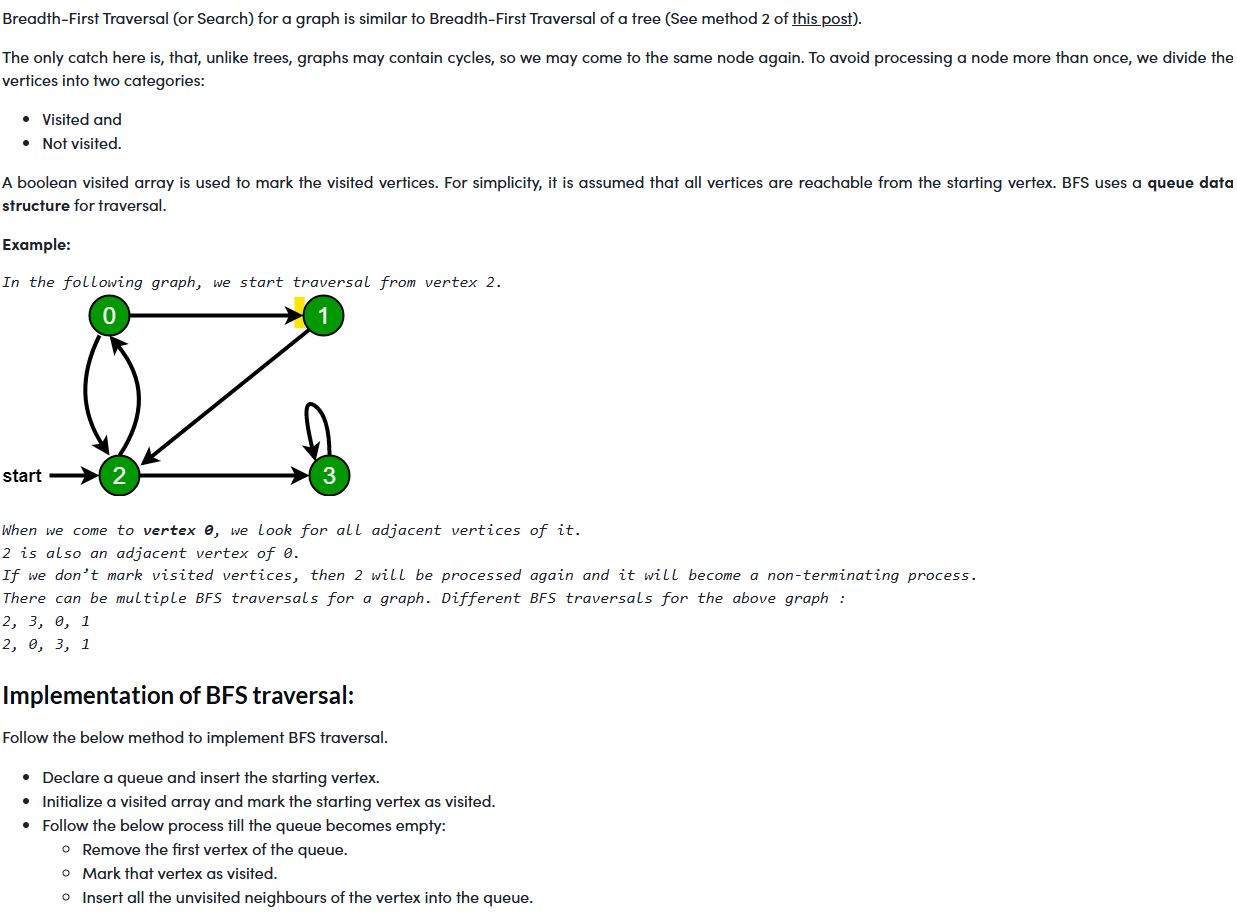

In [2]:
# Python3 Program to print BFS traversal
# from a given source vertex. BFS(int s)
# traverses vertices reachable from s.
from collections import defaultdict

# This class represents a directed graph
# using adjacency list representation
class Graph:

	# Constructor
	def __init__(self):

		# default dictionary to store graph
		self.graph = defaultdict(list)

	# function to add an edge to graph
	def addEdge(self,u,v):
		self.graph[u].append(v)

	# Function to print a BFS of graph
	def BFS(self, s):

		# Mark all the vertices as not visited
		visited = [False] * (max(self.graph) + 1)

		# Create a queue for BFS
		queue = []

		# Mark the source node as
		# visited and enqueue it
		queue.append(s)
		visited[s] = True

		while queue:

			# Dequeue a vertex from
			# queue and print it
			s = queue.pop(0)
			print (s, end = " ")

			# Get all adjacent vertices of the
			# dequeued vertex s. If a adjacent
			# has not been visited, then mark it
			# visited and enqueue it
			for i in self.graph[s]:
				if visited[i] == False:
					queue.append(i)
					visited[i] = True

# Driver code

# Create a graph given in
# the above diagram
g = Graph()
g.addEdge(0, 1)
g.addEdge(0, 2)
g.addEdge(1, 2)
g.addEdge(2, 0)
g.addEdge(2, 3)
g.addEdge(3, 3)

print ("Following is Breadth First Traversal"
				" (starting from vertex 2)")
g.BFS(2)

Following is Breadth First Traversal (starting from vertex 2)
2 0 3 1 


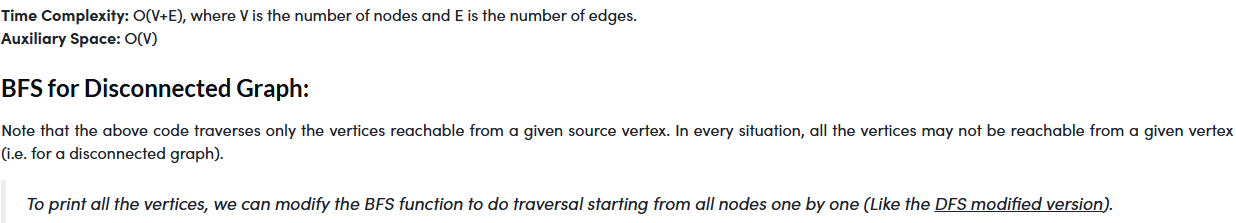

In [3]:
'''
Generic Function for BFS traversal of a Graph
(valid for directed as well as undirected graphs
which can have multiple disconnected components)
-- Inputs --
-> V - represents number of vertices in the Graph
-> adj[] - represents adjacency list for the Graph
-- Output --
-> bfs_traversal - a vector containing bfs traversal
for entire graph
'''
def bfsOfGraph(V, adj):

	bfs_traversal = []
	vis = [False]*V
	for i in range(V):

		# To check if already visited
		if (vis[i] == False):
			q = []
			vis[i] = True
			q.append(i)

			# BFS starting from ith node
			while (len(q) > 0):
				g_node = q.pop(0)

				bfs_traversal.append(g_node)
				for it in adj[g_node]:
					if (vis[it] == False):
						vis[it] = True
						q.append(it)

	return bfs_traversal

# BFS for Disconnected Graph

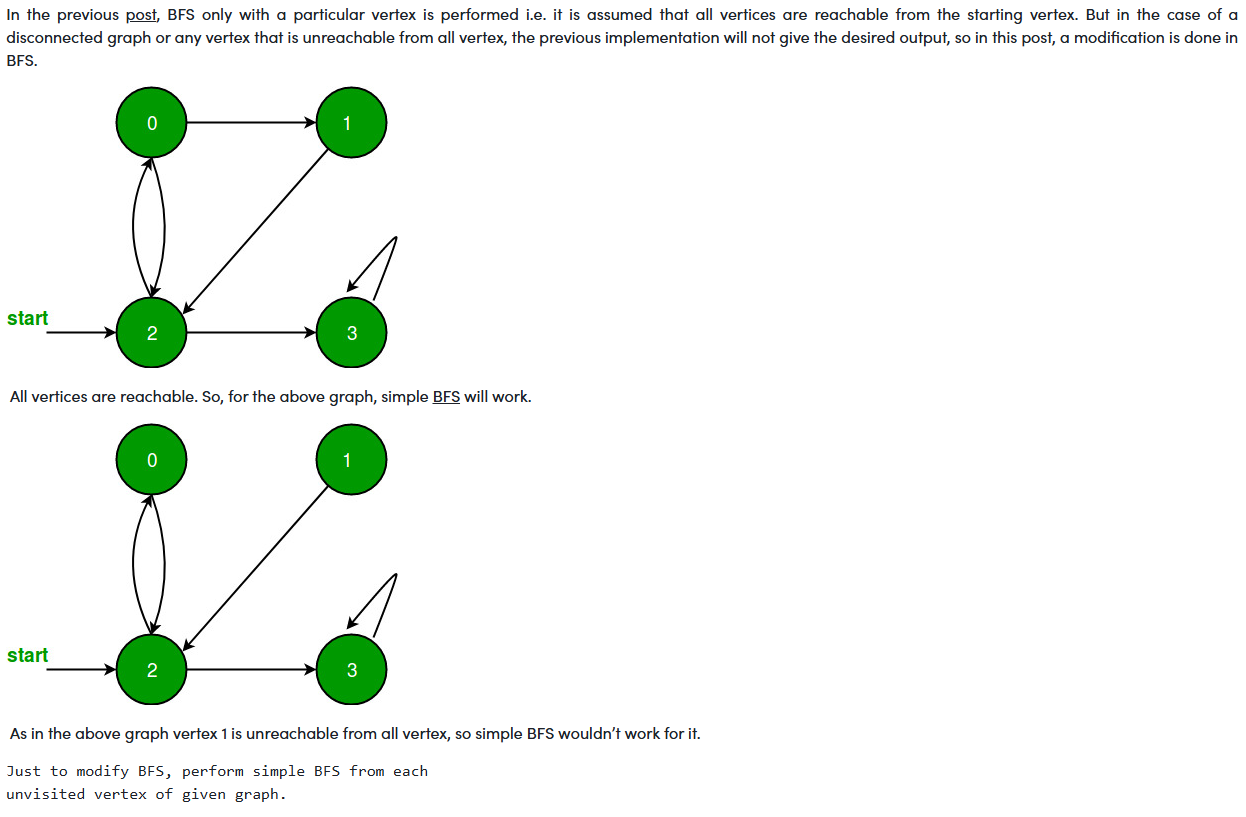

In [4]:
# Python3 implementation of modified BFS
import queue

# A utility function to add an edge
# in an undirected graph.
def addEdge(adj, u, v):
	adj[u].append(v)

# A utility function to do BFS of
# graph from a given vertex u.
def BFSUtil(u, adj, visited):

	# Create a queue for BFS
	q = queue.Queue()

	# Mark the current node as visited
	# and enqueue it
	visited[u] = True
	q.put(u)

	# 'i' will be used to get all adjacent
	# vertices 4 of a vertex list<int>::iterator i

	while(not q.empty()):

		# Dequeue a vertex from queue
		# and print it
		u = q.queue[0]
		print(u, end = " ")
		q.get()

		# Get all adjacent vertices of the
		# dequeued vertex s. If an adjacent
		# has not been visited, then mark
		# it visited and enqueue it
		i = 0
		while i != len(adj[u]):
			if (not visited[adj[u][i]]):
					visited[adj[u][i]] = True
					q.put(adj[u][i])
			i += 1

# This function does BFSUtil() for all
# unvisited vertices.
def BFS(adj, V):
	visited = [False] * V
	for u in range(V):
		if (visited[u] == False):
			BFSUtil(u, adj, visited)

# Driver code
if __name__ == '__main__':

	V = 5
	adj = [[] for i in range(V)]

	addEdge(adj, 0, 4)
	addEdge(adj, 1, 2)
	addEdge(adj, 1, 3)
	addEdge(adj, 1, 4)
	addEdge(adj, 2, 3)
	addEdge(adj, 3, 4)
	BFS(adj, V)

0 4 1 2 3 

# Connected Components in an Undirected Graph using BFS

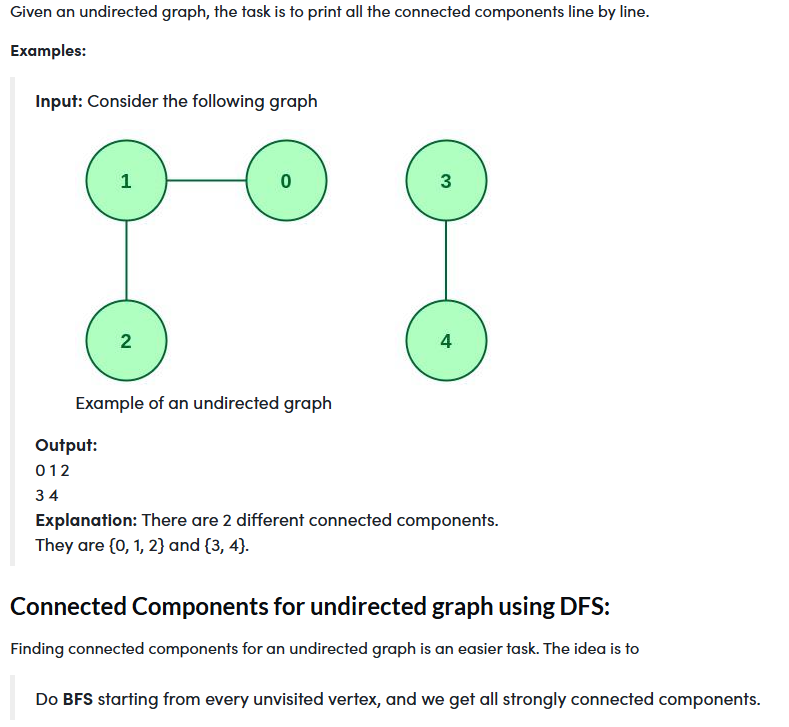

In [5]:
from collections import deque


def addEdge(adj, u, v):
    adj[u].append(v)
    adj[v].append(u)


def BFS(adj, s, visited):
    q = deque()
    q.append(s)
    visited[s] = True

    while q:
        s = q.popleft()
        print(s, end=' ')

        for u in adj[s]:
            if visited[u] == False:
                q.append(u)
                visited[u] = True

    print()


def BFSDis(adj):
    visited = [False] * len(adj)

    res = 0

    for u in range(len(adj)):
        if visited[u] == False:
            res+=1
            BFS(adj, u, visited)

    return res


def printGraph(adj):
    for u, l in enumerate(adj):
        print(u, l)


# main

v = 8

adj = [[1, 2], [0, 2], [0, 1], [4], [3], [6,7], [5],[5]]

printGraph(adj)

print('\nconnected component')
print('no of connected component',BFSDis(adj))

0 [1, 2]
1 [0, 2]
2 [0, 1]
3 [4]
4 [3]
5 [6, 7]
6 [5]
7 [5]

connected component
0 1 2 
3 4 
5 6 7 
no of connected component 3


# Applications of DFS

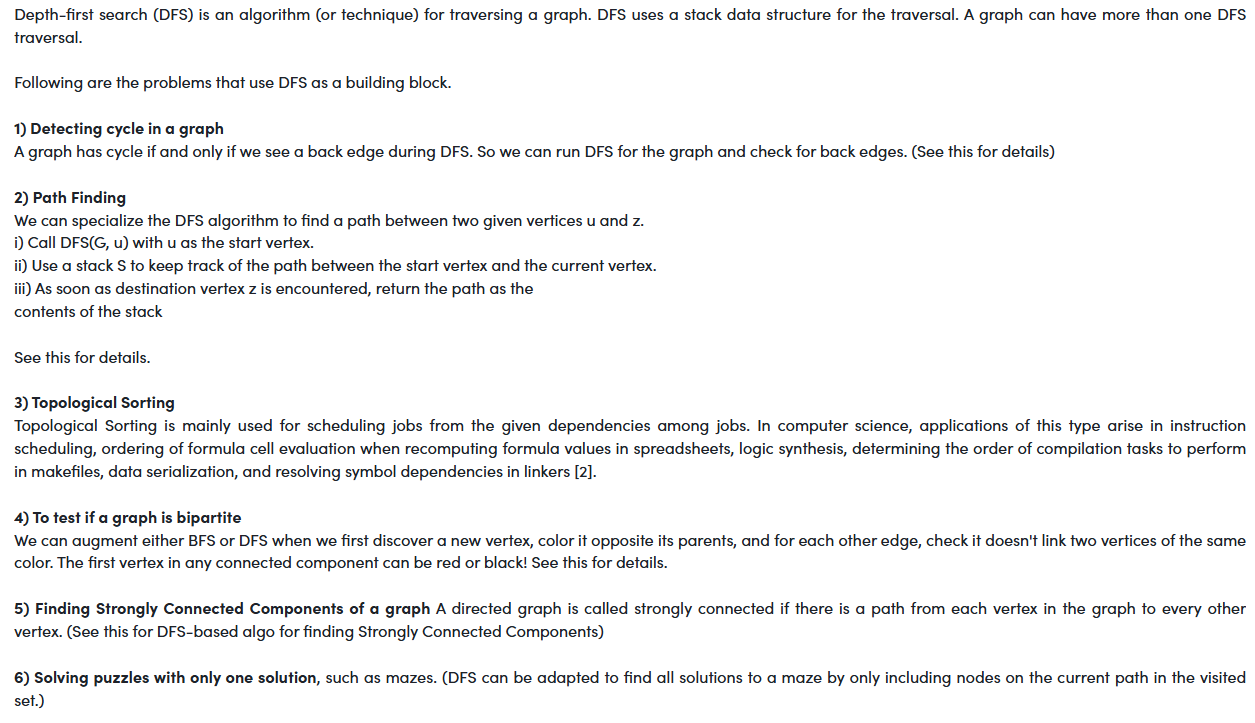

# Applications of BFS

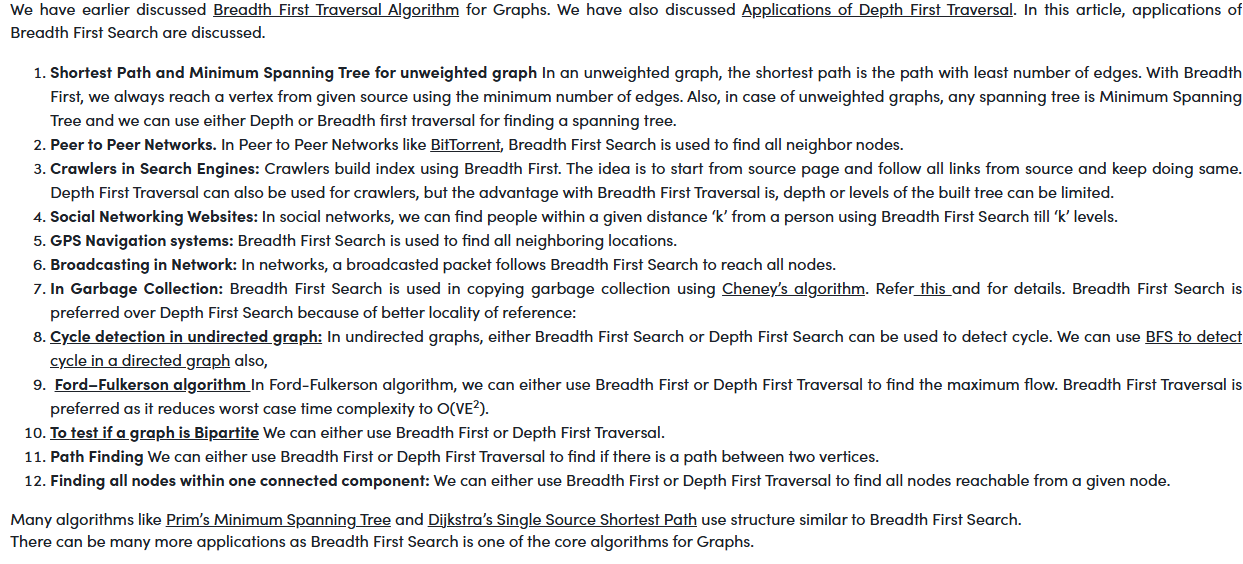

# Depth First Search or DFS for a Graph

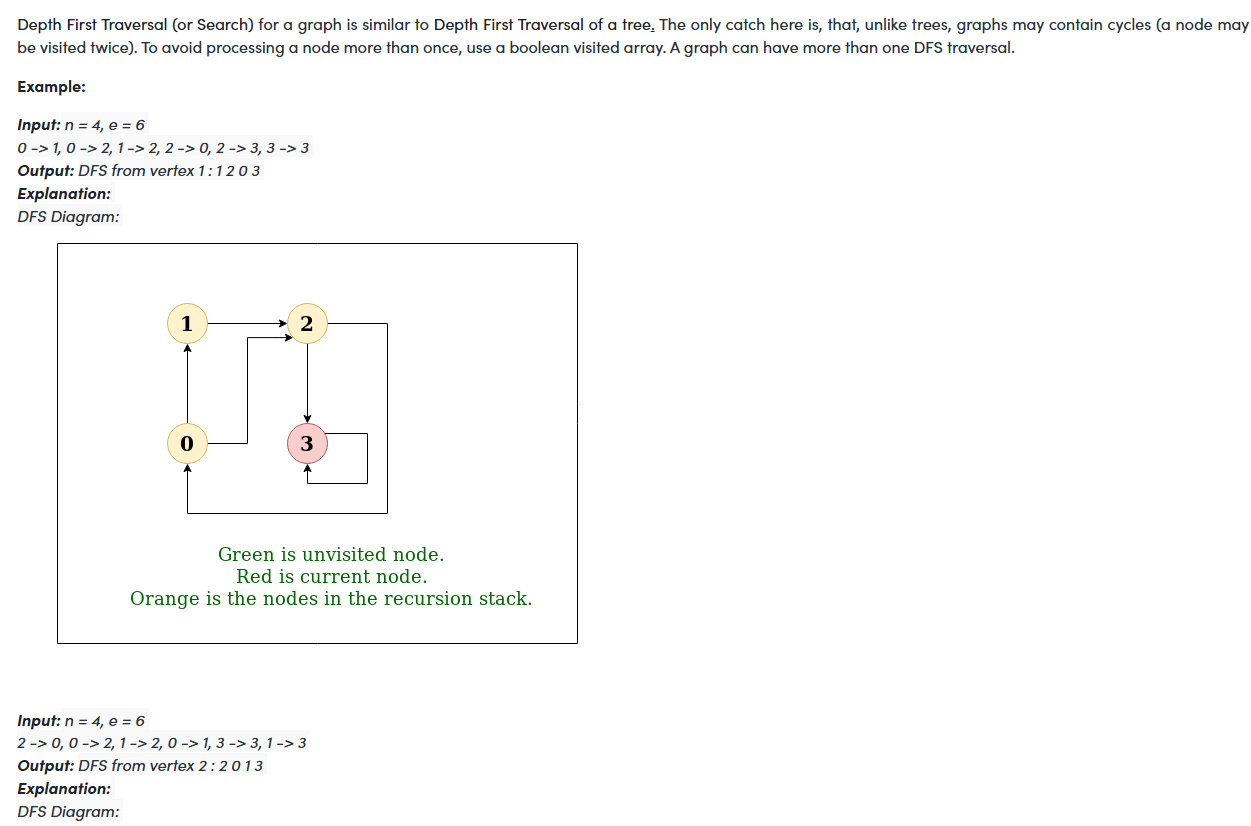

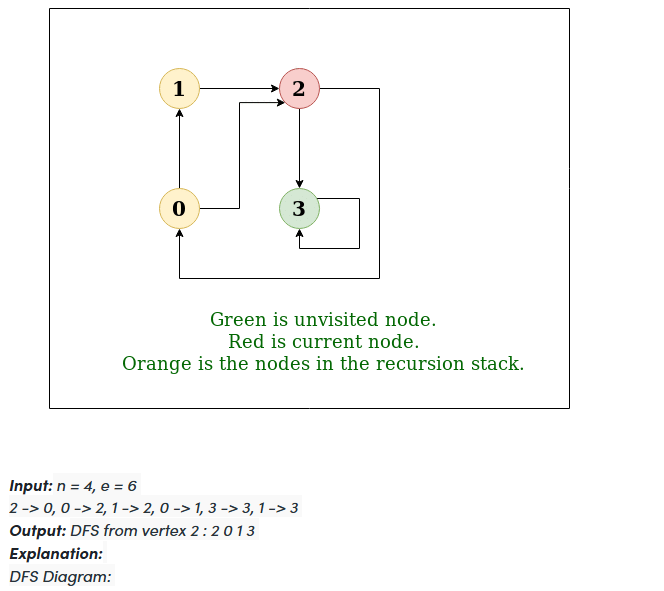

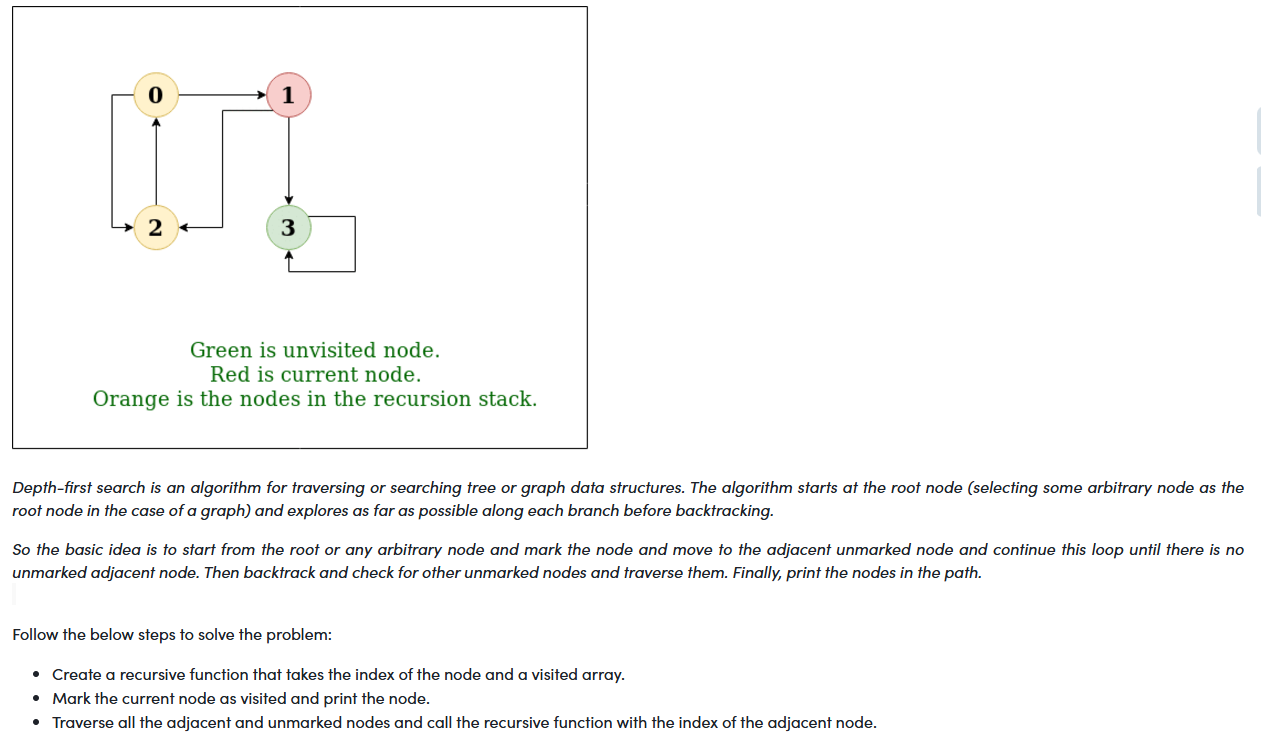

In [6]:
# Python3 program to print DFS traversal
# from a given graph
from collections import defaultdict

# This class represents a directed graph using
# adjacency list representation


class Graph:

	# Constructor
	def __init__(self):

		# default dictionary to store graph
		self.graph = defaultdict(list)

	# function to add an edge to graph
	def addEdge(self, u, v):
		self.graph[u].append(v)

	# A function used by DFS
	def DFSUtil(self, v, visited):

		# Mark the current node as visited
		# and print it
		visited.add(v)
		print(v, end=' ')

		# Recur for all the vertices
		# adjacent to this vertex
		for neighbour in self.graph[v]:
			if neighbour not in visited:
				self.DFSUtil(neighbour, visited)

	# The function to do DFS traversal. It uses
	# recursive DFSUtil()
	def DFS(self, v):

		# Create a set to store visited vertices
		visited = set()

		# Call the recursive helper function
		# to print DFS traversal
		self.DFSUtil(v, visited)

# Driver's code


# Create a graph given
# in the above diagram
if __name__ == "__main__":
	g = Graph()
	g.addEdge(0, 1)
	g.addEdge(0, 2)
	g.addEdge(1, 2)
	g.addEdge(2, 0)
	g.addEdge(2, 3)
	g.addEdge(3, 3)

	print("Following is DFS from (starting from vertex 2)")
	# Function call
	g.DFS(2)

Following is DFS from (starting from vertex 2)
2 0 1 3 

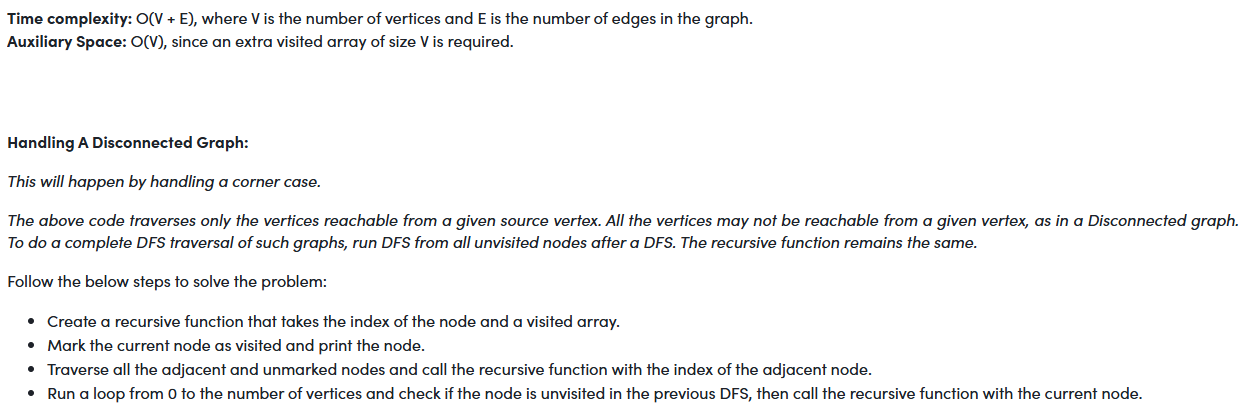

In [8]:
'''Python3 program to print DFS traversal for complete graph'''
from collections import defaultdict

# this class represents a directed graph using adjacency list representation


class Graph:
	# Constructor
	def __init__(self):
		# default dictionary to store graph
		self.graph = defaultdict(list)

	# Function to add an edge to graph
	def addEdge(self, u, v):
		self.graph[u].append(v)
	# A function used by DFS

	def DFSUtil(self, v, visited):
		# Mark the current node as visited and print it
		visited.add(v)
		print(v, end=" ")

		# recur for all the vertices adjacent to this vertex
		for neighbour in self.graph[v]:
			if neighbour not in visited:
				self.DFSUtil(neighbour, visited)
		# The function to do DFS traversal. It uses recursive DFSUtil

	def DFS(self):
		# create a set to store all visited vertices
		visited = set()
		# call the recursive helper function to print DFS traversal starting from all
		# vertices one by one
		for vertex in self.graph:
			if vertex not in visited:
				self.DFSUtil(vertex, visited)
# Driver's code
# create a graph given in the above diagram

if __name__ == "__main__":
    print("Following is Depth First Traversal \n")
    g = Graph()
    g.addEdge(0, 1)
    g.addEdge(0, 2)
    g.addEdge(1, 2)
    g.addEdge(2, 0)
    g.addEdge(2, 3)
    g.addEdge(3, 3)

    # Function call
    g.DFS()

Following is Depth First Traversal 

0 1 2 3 

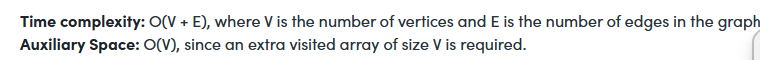

# DFS for Disconnected Graph

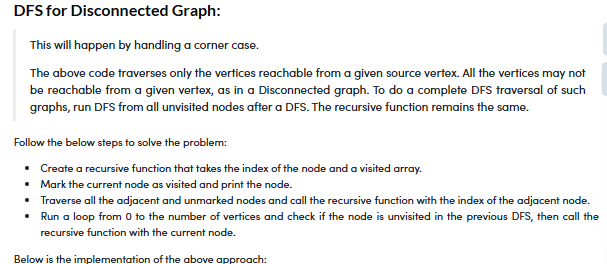

In [3]:
'''Python3 program to print DFS traversal for complete graph'''
from collections import defaultdict

# this class represents a directed graph using adjacency list representation


class Graph:
    # Constructor
    def __init__(self):
        # default dictionary to store graph
        self.graph = defaultdict(list)

    # Function to add an edge to graph
    def addEdge(self, u, v):
        self.graph[u].append(v)
    # A function used by DFS

    def DFSUtil(self, v, visited):
        # Mark the current node as visited and print it
        visited.add(v)
        print(v, end=" ")

        # recur for all the vertices adjacent to this vertex
        for neighbour in self.graph[v]:
            if neighbour not in visited:
                self.DFSUtil(neighbour, visited)
        # The function to do DFS traversal. It uses recursive DFSUtil

    def DFS(self):
        # create a set to store all visited vertices
        visited = set()
        # call the recursive helper function to print DFS traversal starting from all
        # vertices one by one
        for vertex in self.graph:
            if vertex not in visited:
                self.DFSUtil(vertex, visited)
# Driver's code
# create a graph given in the above diagram

if __name__ == "__main__":
  print("Following is Depth First Traversal \n")
  g = Graph()
  g.addEdge(0, 1)
  g.addEdge(0, 2)
  g.addEdge(1, 2)
  g.addEdge(2, 0)
  g.addEdge(2, 3)
  g.addEdge(3, 3)

  # Function call
  g.DFS()

Following is Depth First Traversal 

0 1 2 3 

**Time complexity: O(V + E)**, where V is the number of vertices and E is the number of edges in the graph.

**Auxiliary Space: O(V),** since an extra visited array of size V is required.



# Connected Components in an Undirected Graph

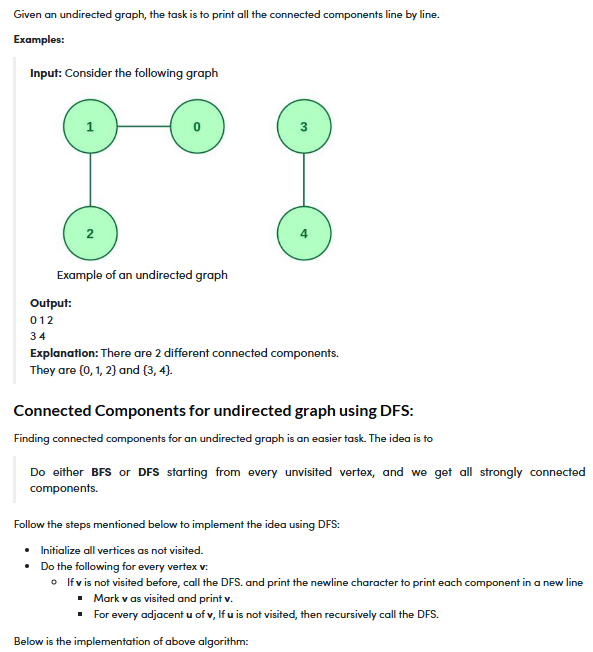

In [4]:
# Python program to print connected
# components in an undirected graph


class Graph:

    # init function to declare class variables
    def __init__(self, V):
        self.V = V
        self.adj = [[] for i in range(V)]

    def DFSUtil(self, temp, v, visited):

        # Mark the current vertex as visited
        visited[v] = True

        # Store the vertex to list
        temp.append(v)

        # Repeat for all vertices adjacent
        # to this vertex v
        for i in self.adj[v]:
            if visited[i] == False:

                # Update the list
                temp = self.DFSUtil(temp, i, visited)
        return temp

    # method to add an undirected edge
    def addEdge(self, v, w):
        self.adj[v].append(w)
        self.adj[w].append(v)

    # Method to retrieve connected components
    # in an undirected graph
    def connectedComponents(self):
        visited = []
        cc = []
        for i in range(self.V):
            visited.append(False)
        for v in range(self.V):
            if visited[v] == False:
                temp = []
                cc.append(self.DFSUtil(temp, v, visited))
        return cc


# Driver Code
if __name__ == "__main__":

    # Create a graph given in the above diagram
    # 5 vertices numbered from 0 to 4
    g = Graph(5)
    g.addEdge(1, 0)
    g.addEdge(2, 1)
    g.addEdge(3, 4)
    cc = g.connectedComponents()
    print("Following are connected components")
    print(cc)

# This code is contributed by Abhishek Valsan

Following are connected components
[[0, 1, 2], [3, 4]]


**Time Complexity: O(V + E)** where V is the number of vertices and E is the number of edges.


**Auxiliary Space: O(V)**

# Shortest Path in an Unweighted Graph

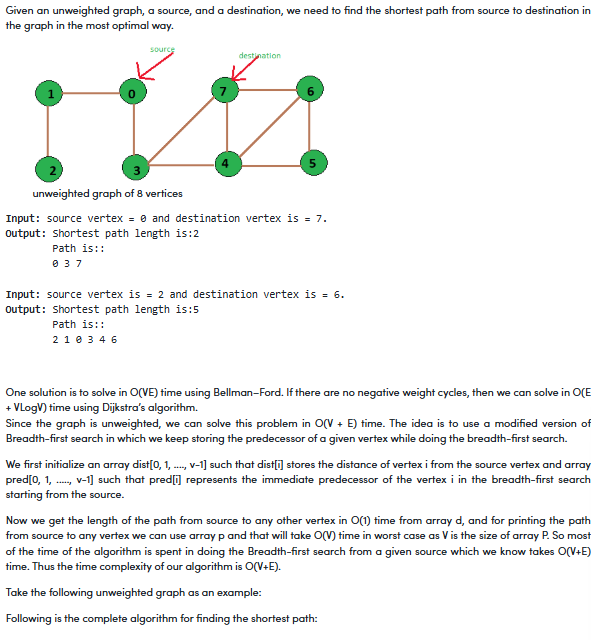

In [5]:
# Python3 code for printing shortest path between
# two vertices of unweighted graph

# utility function to form edge between two vertices
# source and dest
def add_edge(adj, src, dest):

    adj[src].append(dest);
    adj[dest].append(src);

# a modified version of BFS that stores predecessor
# of each vertex in array p
# and its distance from source in array d
def BFS(adj, src, dest, v, pred, dist):

    # a queue to maintain queue of vertices whose
    # adjacency list is to be scanned as per normal
    # DFS algorithm
    queue = []

    # boolean array visited[] which stores the
    # information whether ith vertex is reached
    # at least once in the Breadth first search
    visited = [False for i in range(v)];

    # initially all vertices are unvisited
    # so v[i] for all i is false
    # and as no path is yet constructed
    # dist[i] for all i set to infinity
    for i in range(v):

        dist[i] = 1000000
        pred[i] = -1;

    # now source is first to be visited and
    # distance from source to itself should be 0
    visited[src] = True;
    dist[src] = 0;
    queue.append(src);

    # standard BFS algorithm
    while (len(queue) != 0):
        u = queue[0];
        queue.pop(0);
        for i in range(len(adj[u])):

            if (visited[adj[u][i]] == False):
                visited[adj[u][i]] = True;
                dist[adj[u][i]] = dist[u] + 1;
                pred[adj[u][i]] = u;
                queue.append(adj[u][i]);

                # We stop BFS when we find
                # destination.
                if (adj[u][i] == dest):
                    return True;

    return False;

# utility function to print the shortest distance
# between source vertex and destination vertex
def printShortestDistance(adj, s, dest, v):

    # predecessor[i] array stores predecessor of
    # i and distance array stores distance of i
    # from s
    pred=[0 for i in range(v)]
    dist=[0 for i in range(v)];

    if (BFS(adj, s, dest, v, pred, dist) == False):
        print("Given source and destination are not connected")

    # vector path stores the shortest path
    path = []
    crawl = dest;
    path.append(crawl);

    while (pred[crawl] != -1):
        path.append(pred[crawl]);
        crawl = pred[crawl];


    # distance from source is in distance array
    print("Shortest path length is : " + str(dist[dest]), end = '')

    # printing path from source to destination
    print("\nPath is : : ")

    for i in range(len(path)-1, -1, -1):
        print(path[i], end=' ')

# Driver program to test above functions
if __name__=='__main__':

    # no. of vertices
    v = 8;

    # array of vectors is used to store the graph
    # in the form of an adjacency list
    adj = [[] for i in range(v)];

    # Creating graph given in the above diagram.
    # add_edge function takes adjacency list, source
    # and destination vertex as argument and forms
    # an edge between them.
    add_edge(adj, 0, 1);
    add_edge(adj, 0, 3);
    add_edge(adj, 1, 2);
    add_edge(adj, 3, 4);
    add_edge(adj, 3, 7);
    add_edge(adj, 4, 5);
    add_edge(adj, 4, 6);
    add_edge(adj, 4, 7);
    add_edge(adj, 5, 6);
    add_edge(adj, 6, 7);
    source = 0
    dest = 7;
    printShortestDistance(adj, source, dest, v);

Shortest path length is : 2
Path is : : 
0 3 7 

**Time Complexity : O(V + E)**


**Auxiliary Space: O(V)**

# Detect Cycle in an Undirected Graph

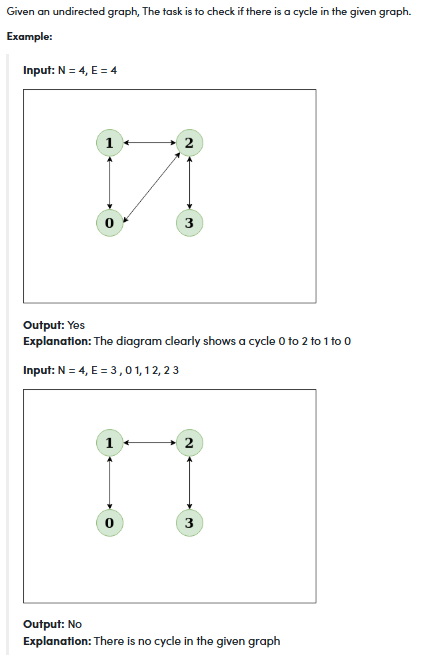

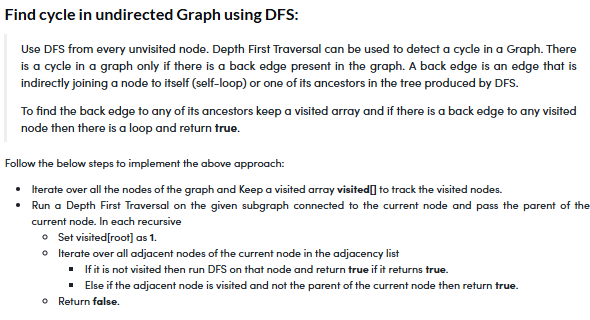

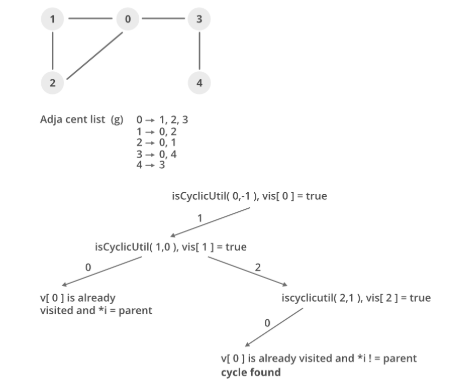

**Another possible scenario:**

If No cycle is detected after running Depth First Traversal for every subgraph the there exists no cycle as shown below

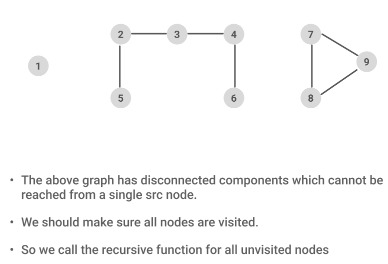

Graph with disconnected components

In [6]:
# Python Program to detect cycle in an undirected graph
from collections import defaultdict

# This class represents a undirected
# graph using adjacency list representation


class Graph:

    def __init__(self, vertices):

        # No. of vertices
        self.V = vertices  # No. of vertices

        # Default dictionary to store graph
        self.graph = defaultdict(list)

    # Function to add an edge to graph
    def addEdge(self, v, w):

        # Add w to v_s list
        self.graph[v].append(w)

        # Add v to w_s list
        self.graph[w].append(v)

    # A recursive function that uses
    # visited[] and parent to detect
    # cycle in subgraph reachable from vertex v.
    def isCyclicUtil(self, v, visited, parent):

        # Mark the current node as visited
        visited[v] = True

        # Recur for all the vertices
        # adjacent to this vertex
        for i in self.graph[v]:

            # If the node is not
            # visited then recurse on it
            if visited[i] == False:
                if(self.isCyclicUtil(i, visited, v)):
                    return True
            # If an adjacent vertex is
            # visited and not parent
            # of current vertex,
            # then there is a cycle
            elif parent != i:
                return True

        return False

    # Returns true if the graph
    # contains a cycle, else false.

    def isCyclic(self):

        # Mark all the vertices
        # as not visited
        visited = [False]*(self.V)

        # Call the recursive helper
        # function to detect cycle in different
        # DFS trees
        for i in range(self.V):

            # Don't recur for u if it
            # is already visited
            if visited[i] == False:
                if(self.isCyclicUtil
                   (i, visited, -1)) == True:
                    return True

        return False


# Create a graph given in the above diagram
g = Graph(5)
g.addEdge(1, 0)
g.addEdge(1, 2)
g.addEdge(2, 0)
g.addEdge(0, 3)
g.addEdge(3, 4)

if g.isCyclic():
    print("Graph contains cycle")
else:
    print("Graph doesn't contain cycle ")
g1 = Graph(3)
g1.addEdge(0, 1)
g1.addEdge(1, 2)


if g1.isCyclic():
    print("Graph contains cycle")
else:
    print("Graph doesn't contain cycle ")

Graph contains cycle
Graph doesn't contain cycle 


**Time Complexity: O(V+E)**, The program does a simple DFS Traversal of the graph which is represented using an adjacency list. So the time complexity is O(V+E).


**Auxiliary Space: O(V)**, To store the visited array O(V) space is required.

# Detect Cycle in a Directed Graph

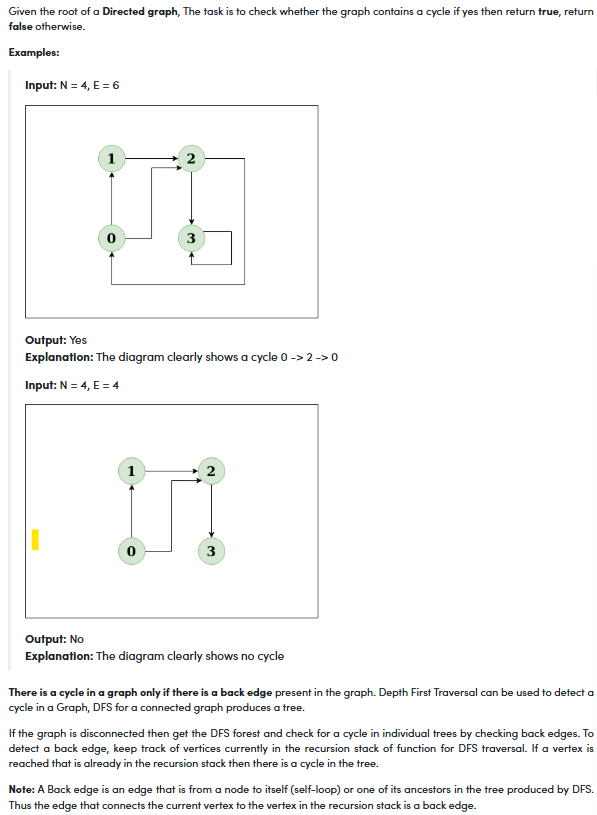

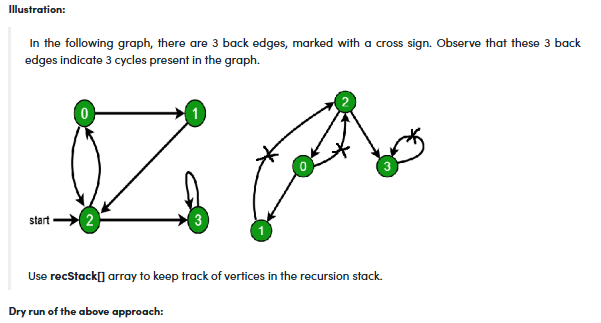

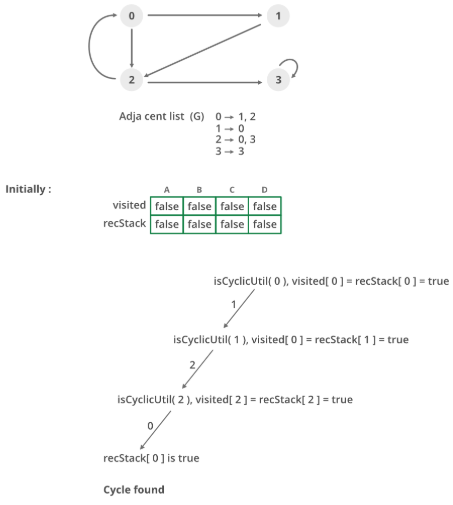

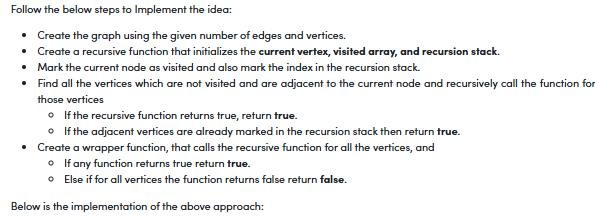

In [8]:
# Python program to detect cycle
# in a graph

from collections import defaultdict

class Graph():
    def __init__(self,vertices):
        self.graph = defaultdict(list)
        self.V = vertices

    def addEdge(self,u,v):
        self.graph[u].append(v)

    def isCyclicUtil(self, v, visited, recStack):

        # Mark current node as visited and
        # adds to recursion stack
        visited[v] = True
        recStack[v] = True

        # Recur for all neighbours
        # if any neighbour is visited and in
        # recStack then graph is cyclic
        for neighbour in self.graph[v]:
            if visited[neighbour] == False:
                if self.isCyclicUtil(neighbour, visited, recStack) == True:
                    return True
            elif recStack[neighbour] == True:
                return True

        # The node needs to be popped from
        # recursion stack before function ends
        recStack[v] = False
        return False

    # Returns true if graph is cyclic else false
    def isCyclic(self):
        visited = [False] * (self.V + 1)
        recStack = [False] * (self.V + 1)
        for node in range(self.V):
            if visited[node] == False:
                if self.isCyclicUtil(node,visited,recStack) == True:
                    return True
        return False

g = Graph(4)
g.addEdge(0, 1)
g.addEdge(0, 2)
g.addEdge(1, 2)
g.addEdge(2, 0)
g.addEdge(2, 3)
g.addEdge(3, 3)
if g.isCyclic() == 1:
    print ("Graph contains cycle")
else:
    print ("Graph doesn't contain cycle")

Graph contains cycle


**Time Complexity: O(V+E)**, the Time Complexity of this method is the same as the time complexity of DFS traversal which is O(V+E).


**Auxiliary Space: O(V)**. To store the visited and recursion stack O(V) space is needed.

# Topological Sorting (Kahn's BFS Based Algorithm)

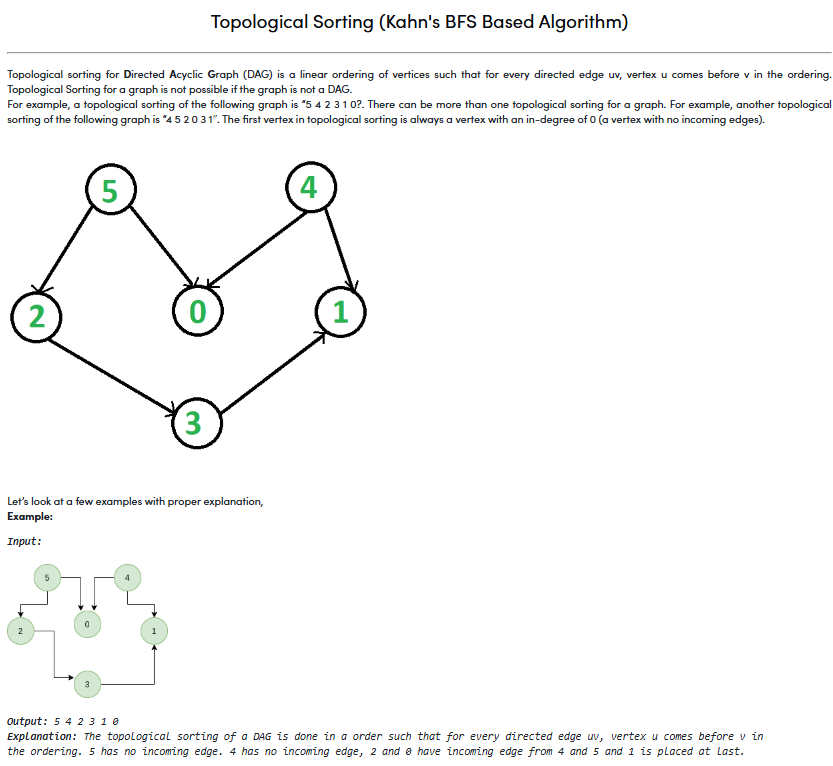

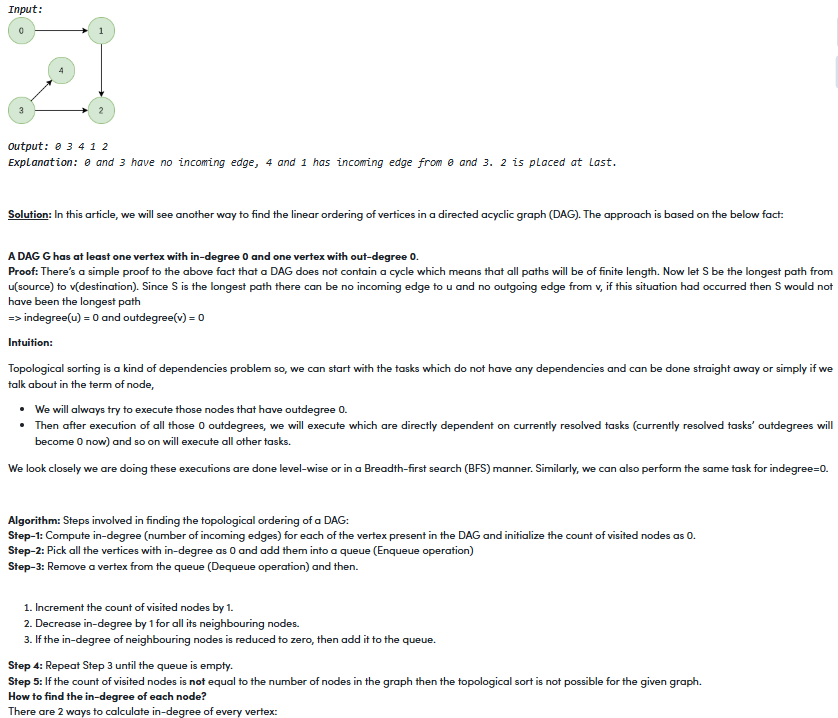

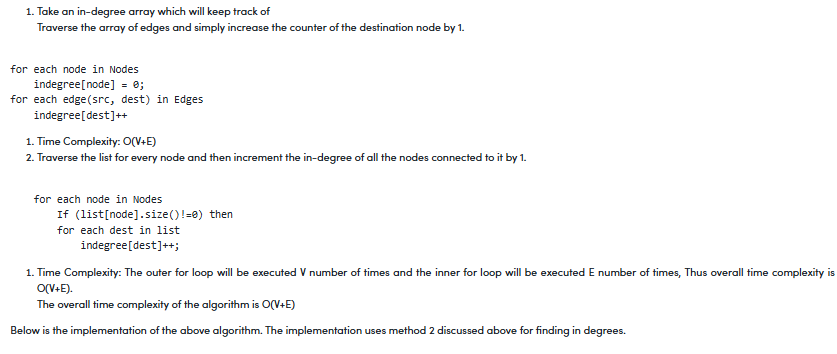

In [9]:
# A Python program to print topological sorting of a graph
# using indegrees
from collections import defaultdict

# Class to represent a graph
class Graph:
	def __init__(self, vertices):
		self.graph = defaultdict(list) # dictionary containing adjacency List
		self.V = vertices # No. of vertices

	# function to add an edge to graph
	def addEdge(self, u, v):
		self.graph[u].append(v)


	# The function to do Topological Sort.
	def topologicalSort(self):

		# Create a vector to store indegrees of all
		# vertices. Initialize all indegrees as 0.
		in_degree = [0]*(self.V)

		# Traverse adjacency lists to fill indegrees of
		# vertices. This step takes O(V + E) time
		for i in self.graph:
			for j in self.graph[i]:
				in_degree[j] += 1

		# Create an queue and enqueue all vertices with
		# indegree 0
		queue = []
		for i in range(self.V):
			if in_degree[i] == 0:
				queue.append(i)

		# Initialize count of visited vertices
		cnt = 0

		# Create a vector to store result (A topological
		# ordering of the vertices)
		top_order = []

		# One by one dequeue vertices from queue and enqueue
		# adjacents if indegree of adjacent becomes 0
		while queue:

			# Extract front of queue (or perform dequeue)
			# and add it to topological order
			u = queue.pop(0)
			top_order.append(u)

			# Iterate through all neighbouring nodes
			# of dequeued node u and decrease their in-degree
			# by 1
			for i in self.graph[u]:
				in_degree[i] -= 1
				# If in-degree becomes zero, add it to queue
				if in_degree[i] == 0:
					queue.append(i)

			cnt += 1

		# Check if there was a cycle
		if cnt != self.V:
			print ("There exists a cycle in the graph")
		else :
			# Print topological order
			print (top_order)


g = Graph(6)
g.addEdge(5, 2);
g.addEdge(5, 0);
g.addEdge(4, 0);
g.addEdge(4, 1);
g.addEdge(2, 3);
g.addEdge(3, 1);

print ("Following is a Topological Sort of the given graph")
g.topologicalSort()

Following is a Topological Sort of the given graph
[4, 5, 2, 0, 3, 1]


**Complexity Analysis:**

**Time Complexity: O(V+E).**
The outer for loop will be executed V number of times and the inner for loop will be executed E number of times.


**Auxiliary Space: O(V).**
The queue needs to store all the vertices of the graph. So the space required is O(V)

# Topological Sorting (DFS Based Algorithm)

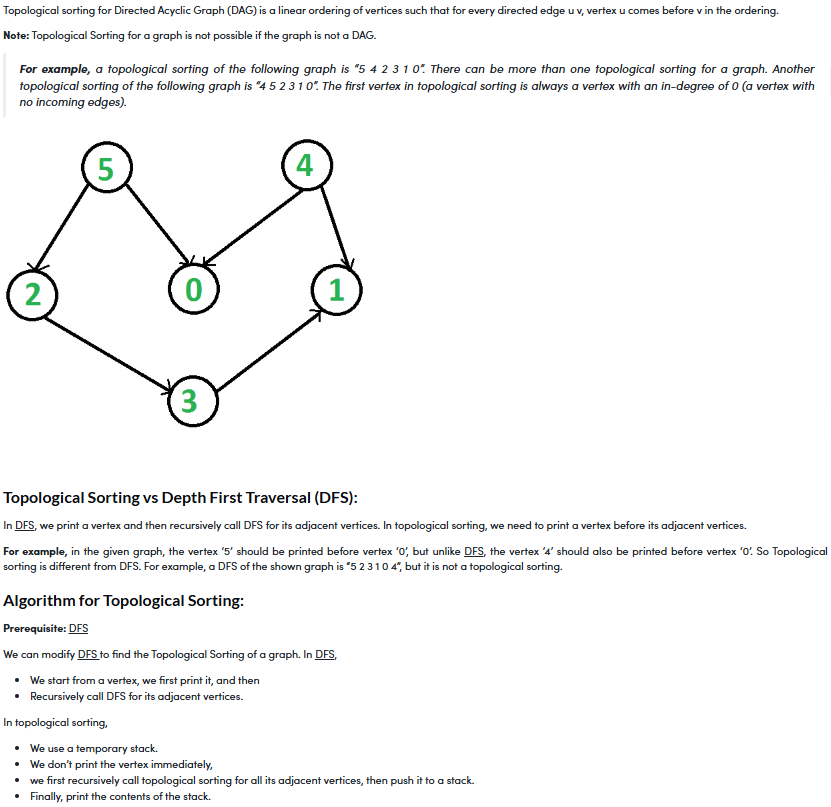

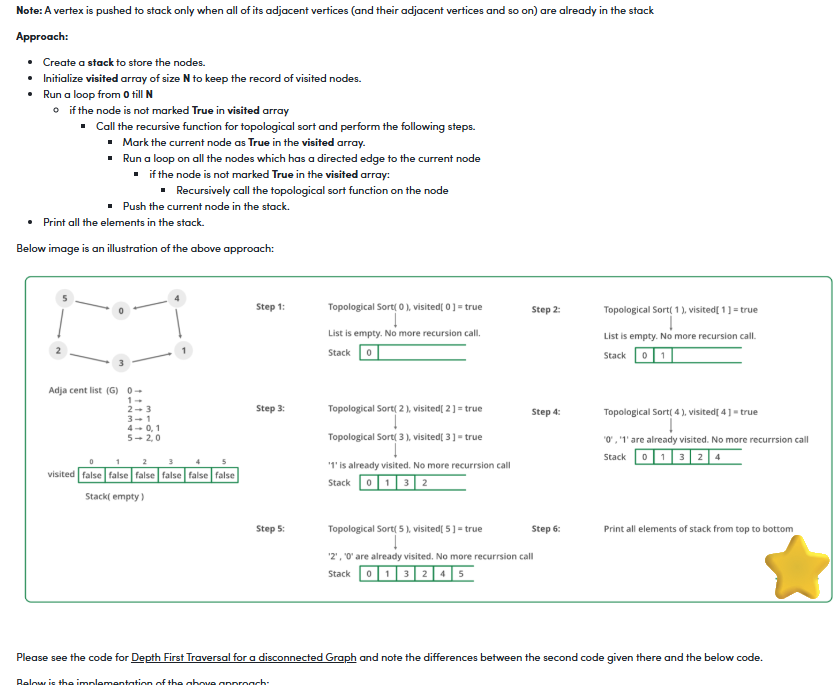

In [10]:
# Python program to print topological sorting of a DAG
from collections import defaultdict

# Class to represent a graph


class Graph:
	def __init__(self, vertices):
		self.graph = defaultdict(list) # dictionary containing adjacency List
		self.V = vertices # No. of vertices

	# function to add an edge to graph
	def addEdge(self, u, v):
		self.graph[u].append(v)

	# A recursive function used by topologicalSort
	def topologicalSortUtil(self, v, visited, stack):

		# Mark the current node as visited.
		visited[v] = True

		# Recur for all the vertices adjacent to this vertex
		for i in self.graph[v]:
			if visited[i] == False:
				self.topologicalSortUtil(i, visited, stack)

		# Push current vertex to stack which stores result
		stack.append(v)

	# The function to do Topological Sort. It uses recursive
	# topologicalSortUtil()
	def topologicalSort(self):
		# Mark all the vertices as not visited
		visited = [False]*self.V
		stack = []

		# Call the recursive helper function to store Topological
		# Sort starting from all vertices one by one
		for i in range(self.V):
			if visited[i] == False:
				self.topologicalSortUtil(i, visited, stack)

		# Print contents of the stack
		print(stack[::-1]) # return list in reverse order


# Driver Code
if __name__ == '__main__':
	g = Graph(6)
	g.addEdge(5, 2)
	g.addEdge(5, 0)
	g.addEdge(4, 0)
	g.addEdge(4, 1)
	g.addEdge(2, 3)
	g.addEdge(3, 1)

	print("Following is a Topological Sort of the given graph")

	# Function Call
	g.topologicalSort()

Following is a Topological Sort of the given graph
[5, 4, 2, 3, 1, 0]


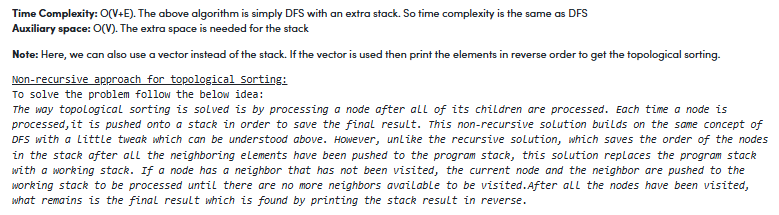

In [12]:
# Python program to print topological sorting of a DAG
from collections import defaultdict

# Class to represent a graph


class Graph:
	def __init__(self, vertices):
		self.graph = defaultdict(list) # dictionary containing adjacency List
		self.V = vertices # No. of vertices

	# function to add an edge to graph
	def addEdge(self, u, v):
		self.graph[u].append(v)

	# neighbors generator given key
	def neighbor_gen(self, v):
		for k in self.graph[v]:
			yield k

	# non recursive topological sort
	def nonRecursiveTopologicalSortUtil(self, v, visited, stack):

		# working stack contains key and the corresponding current generator
		working_stack = [(v, self.neighbor_gen(v))]

		while working_stack:
			# get last element from stack
			v, gen = working_stack.pop()
			visited[v] = True

			# run through neighbor generator until it's empty
			for next_neighbor in gen:
				if not visited[next_neighbor]: # not seen before?
					# remember current work
					working_stack.append((v, gen))
					# restart with new neighbor
					working_stack.append(
						(next_neighbor, self.neighbor_gen(next_neighbor)))
					break
			else:
				# no already-visited neighbor (or no more of them)
				stack.append(v)

	# The function to do Topological Sort.
	def nonRecursiveTopologicalSort(self):
		# Mark all the vertices as not visited
		visited = [False]*self.V

		# result stack
		stack = []

		# Call the helper function to store Topological
		# Sort starting from all vertices one by one
		for i in range(self.V):
			if not(visited[i]):
				self.nonRecursiveTopologicalSortUtil(i, visited, stack)
		# Print contents of the stack in reverse
		stack.reverse()
		print(stack)


# Driver code
if __name__ == "__main__":
    g = Graph(6)
    g.addEdge(5, 2)
    g.addEdge(5, 0)
    g.addEdge(4, 0)
    g.addEdge(4, 1)
    g.addEdge(2, 3)
    g.addEdge(3, 1)


    # Function call
    print("The following is a Topological Sort of the given graph")
    g.nonRecursiveTopologicalSort()

The following is a Topological Sort of the given graph
[5, 4, 2, 3, 1, 0]


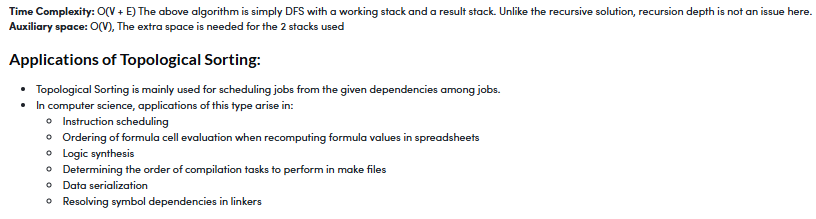

# Shortest Path in Directed Acyclic Graph

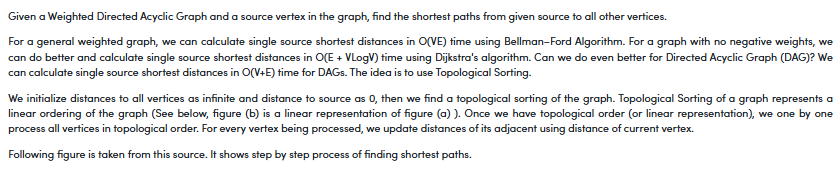

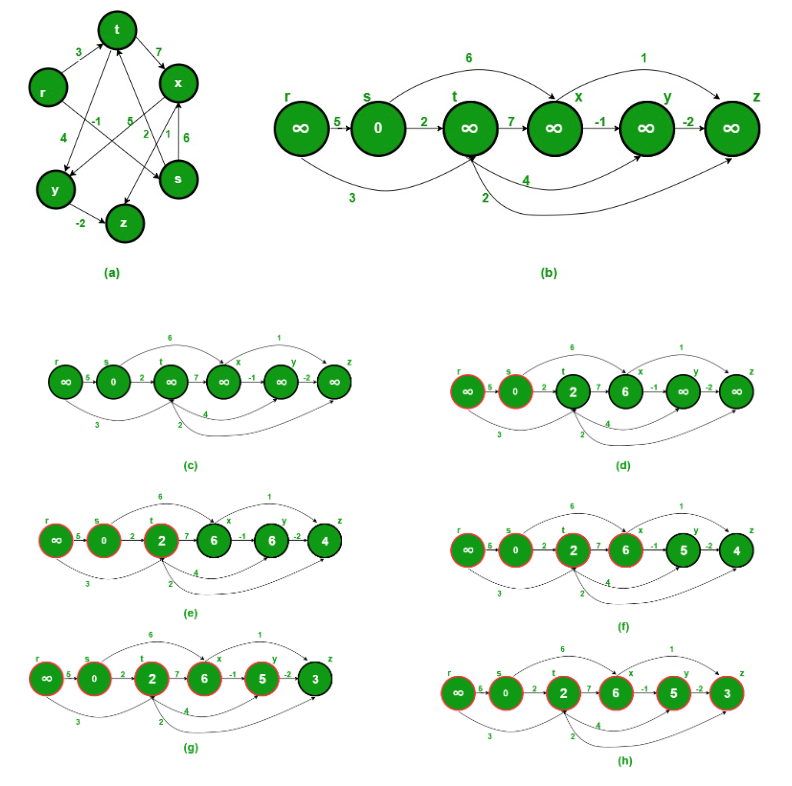

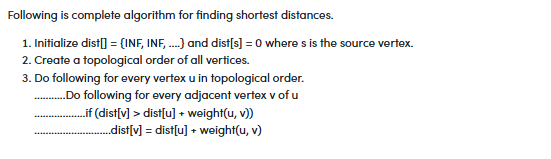

In [13]:
# Python program to find single source shortest paths
# for Directed Acyclic Graphs Complexity :O(V+E)
from collections import defaultdict

# Graph is represented using adjacency list. Every
# node of adjacency list contains vertex number of
# the vertex to which edge connects. It also contains
# weight of the edge
class Graph:
    def __init__(self,vertices):

        self.V = vertices # No. of vertices

        # dictionary containing adjacency List
        self.graph = defaultdict(list)

    # function to add an edge to graph
    def addEdge(self,u,v,w):
        self.graph[u].append((v,w))


    # A recursive function used by shortestPath
    def topologicalSortUtil(self,v,visited,stack):

        # Mark the current node as visited.
        visited[v] = True

        # Recur for all the vertices adjacent to this vertex
        if v in self.graph.keys():
            for node,weight in self.graph[v]:
                if visited[node] == False:
                    self.topologicalSortUtil(node,visited,stack)

        # Push current vertex to stack which stores topological sort
        stack.append(v)


    ''' The function to find shortest paths from given vertex.
        It uses recursive topologicalSortUtil() to get topological
        sorting of given graph.'''
    def shortestPath(self, s):

        # Mark all the vertices as not visited
        visited = [False]*self.V
        stack =[]

        # Call the recursive helper function to store Topological
        # Sort starting from source vertices
        for i in range(self.V):
            if visited[i] == False:
                self.topologicalSortUtil(s,visited,stack)

        # Initialize distances to all vertices as infinite and
        # distance to source as 0
        dist = [float("Inf")] * (self.V)
        dist[s] = 0

        # Process vertices in topological order
        while stack:

            # Get the next vertex from topological order
            i = stack.pop()

            # Update distances of all adjacent vertices
            for node,weight in self.graph[i]:
                if dist[node] > dist[i] + weight:
                    dist[node] = dist[i] + weight

        # Print the calculated shortest distances
        for i in range(self.V):
            print (("%d" %dist[i]) if dist[i] != float("Inf") else  "Inf" ,end=" ")


g = Graph(6)
g.addEdge(0, 1, 5)
g.addEdge(0, 2, 3)
g.addEdge(1, 3, 6)
g.addEdge(1, 2, 2)
g.addEdge(2, 4, 4)
g.addEdge(2, 5, 2)
g.addEdge(2, 3, 7)
g.addEdge(3, 4, -1)
g.addEdge(4, 5, -2)

# source = 1
s = 1

print ("Following are shortest distances from source %d " % s)
g.shortestPath(s)

Following are shortest distances from source 1 
Inf 0 2 6 5 3 

**Time Complexity:** Time complexity of topological sorting is O(V+E). After finding topological order, the algorithm process all vertices and for every vertex, it runs a loop for all adjacent vertices. Total adjacent vertices in a graph is O(E). So the inner loop runs O(V+E) times. Therefore, overall time complexity of this algorithm is O(V+E).

# Prim's Minimum Spanning Tree Algorithm

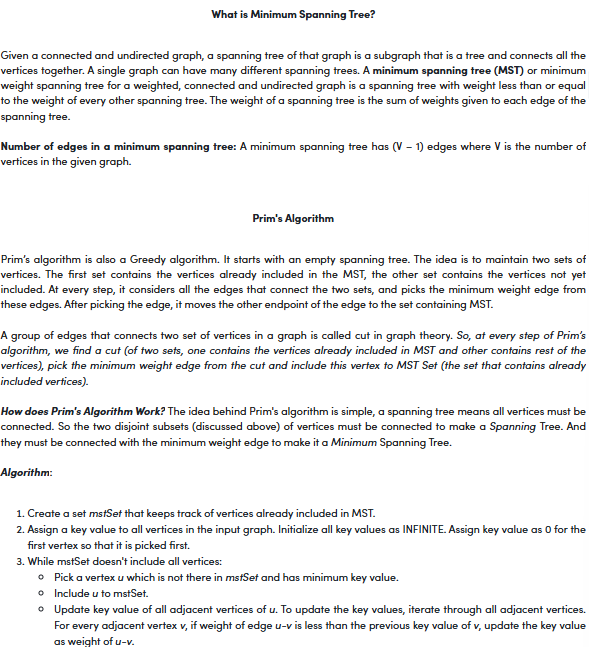

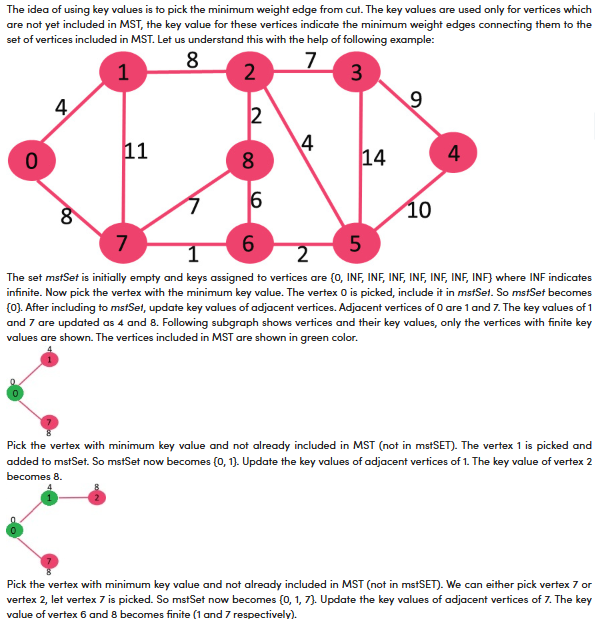

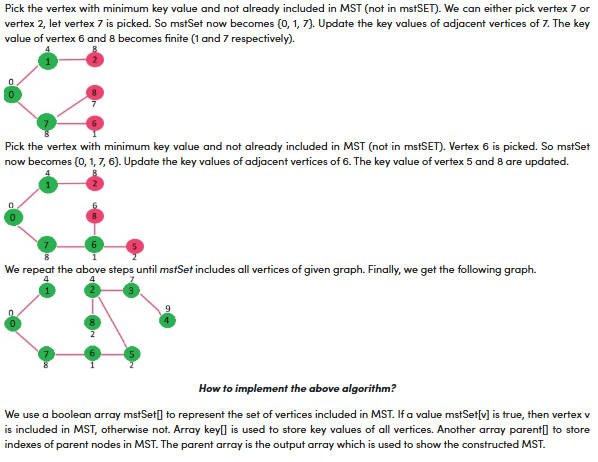

# Dijkstra’s Shortest Path Algorithm

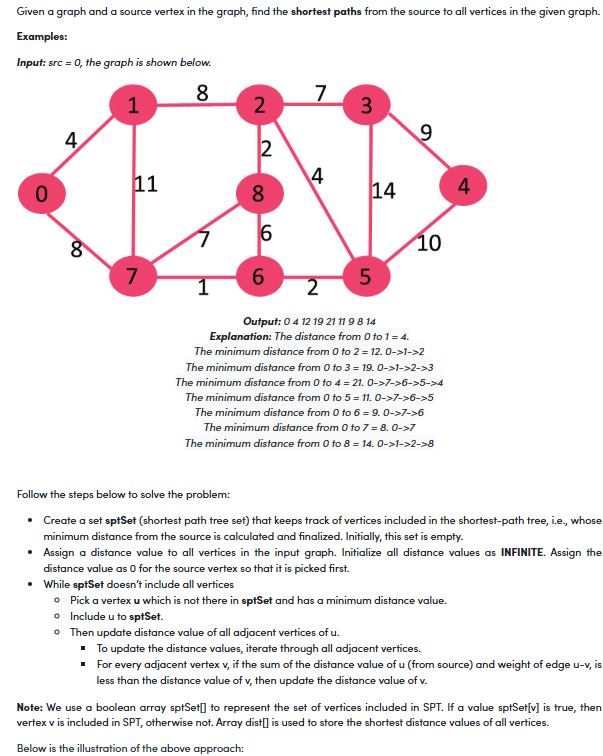

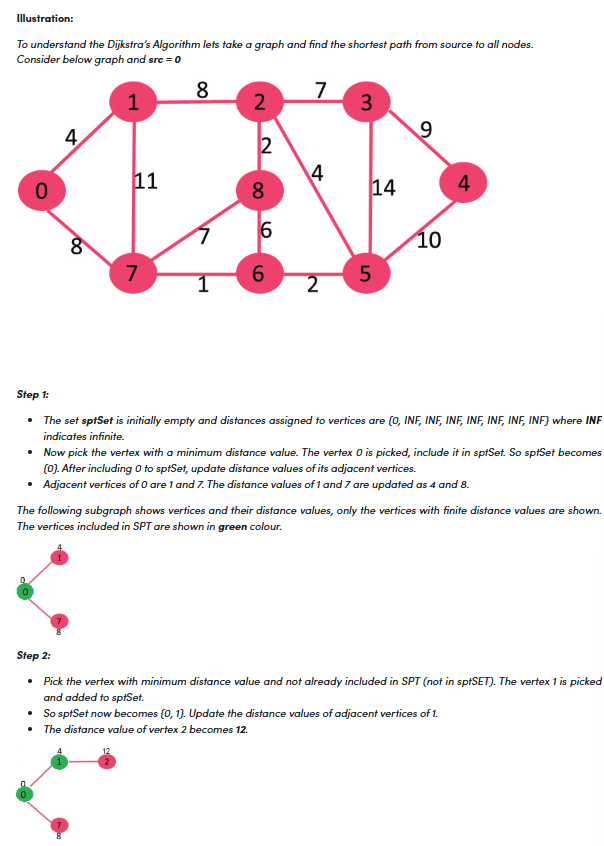

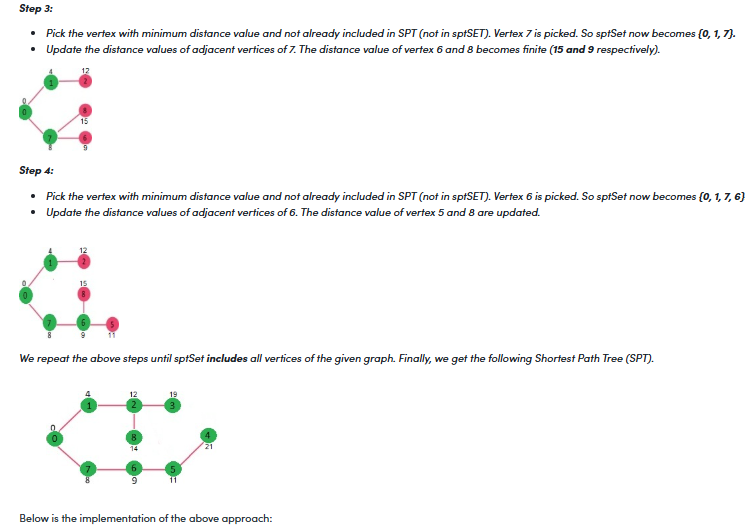

In [14]:
# Python program for Dijkstra's single
# source shortest path algorithm. The program is
# for adjacency matrix representation of the graph

# Library for INT_MAX
import sys


class Graph():

	def __init__(self, vertices):
		self.V = vertices
		self.graph = [[0 for column in range(vertices)]
					for row in range(vertices)]

	def printSolution(self, dist):
		print("Vertex \tDistance from Source")
		for node in range(self.V):
			print(node, "\t", dist[node])

	# A utility function to find the vertex with
	# minimum distance value, from the set of vertices
	# not yet included in shortest path tree
	def minDistance(self, dist, sptSet):

		# Initialize minimum distance for next node
		min = sys.maxsize

		# Search not nearest vertex not in the
		# shortest path tree
		for u in range(self.V):
			if dist[u] < min and sptSet[u] == False:
				min = dist[u]
				min_index = u

		return min_index

	# Function that implements Dijkstra's single source
	# shortest path algorithm for a graph represented
	# using adjacency matrix representation
	def dijkstra(self, src):

		dist = [sys.maxsize] * self.V
		dist[src] = 0
		sptSet = [False] * self.V

		for cout in range(self.V):

			# Pick the minimum distance vertex from
			# the set of vertices not yet processed.
			# x is always equal to src in first iteration
			x = self.minDistance(dist, sptSet)

			# Put the minimum distance vertex in the
			# shortest path tree
			sptSet[x] = True

			# Update dist value of the adjacent vertices
			# of the picked vertex only if the current
			# distance is greater than new distance and
			# the vertex in not in the shortest path tree
			for y in range(self.V):
				if self.graph[x][y] > 0 and sptSet[y] == False and \
						dist[y] > dist[x] + self.graph[x][y]:
					dist[y] = dist[x] + self.graph[x][y]

		self.printSolution(dist)


# Driver's code
if __name__ == "__main__":
	g = Graph(9)
	g.graph = [[0, 4, 0, 0, 0, 0, 0, 8, 0],
			[4, 0, 8, 0, 0, 0, 0, 11, 0],
			[0, 8, 0, 7, 0, 4, 0, 0, 2],
			[0, 0, 7, 0, 9, 14, 0, 0, 0],
			[0, 0, 0, 9, 0, 10, 0, 0, 0],
			[0, 0, 4, 14, 10, 0, 2, 0, 0],
			[0, 0, 0, 0, 0, 2, 0, 1, 6],
			[8, 11, 0, 0, 0, 0, 1, 0, 7],
			[0, 0, 2, 0, 0, 0, 6, 7, 0]
			]

	g.dijkstra(0)

Vertex 	Distance from Source
0 	 0
1 	 4
2 	 12
3 	 19
4 	 21
5 	 11
6 	 9
7 	 8
8 	 14


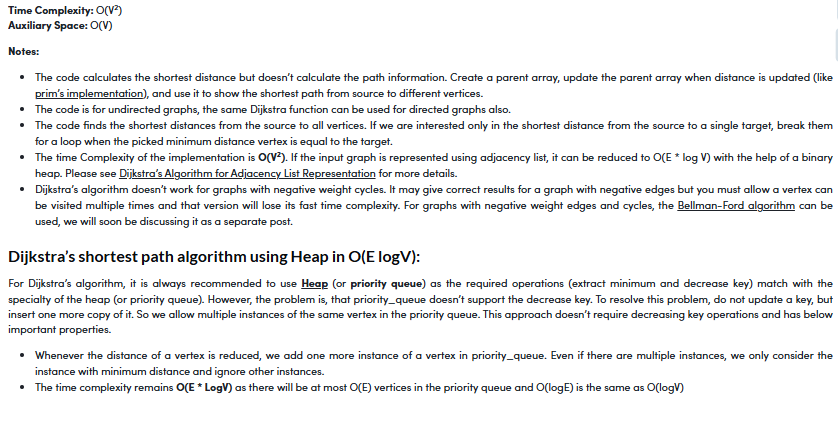

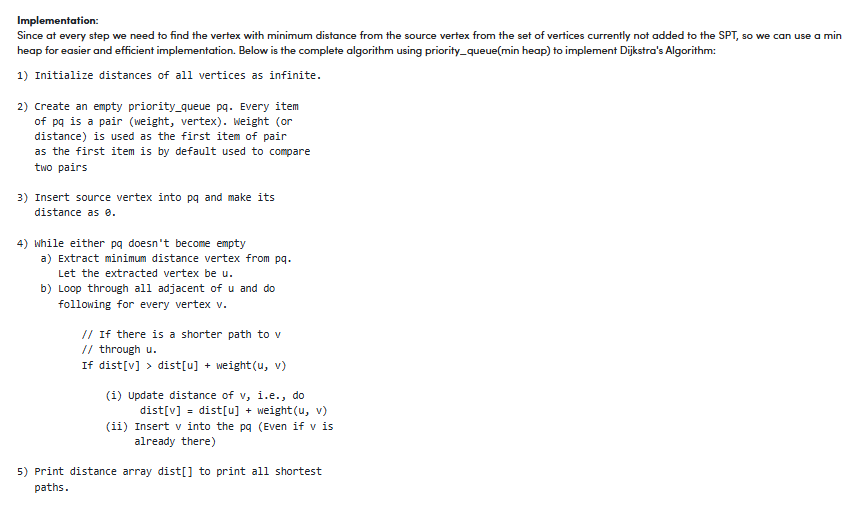

# Kosaraju's Algorithm

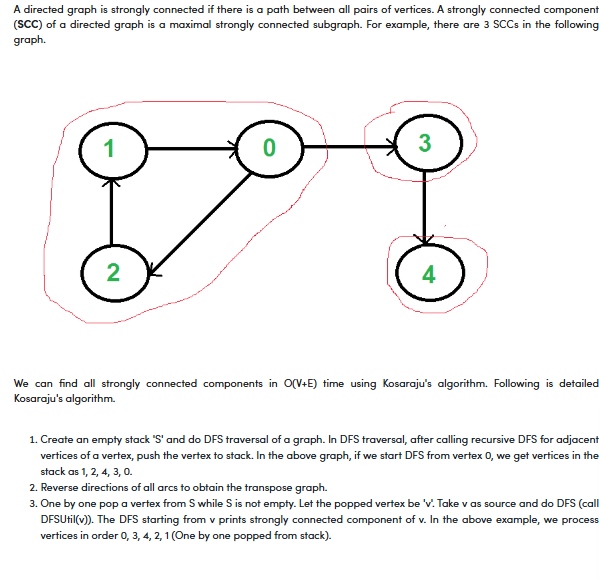

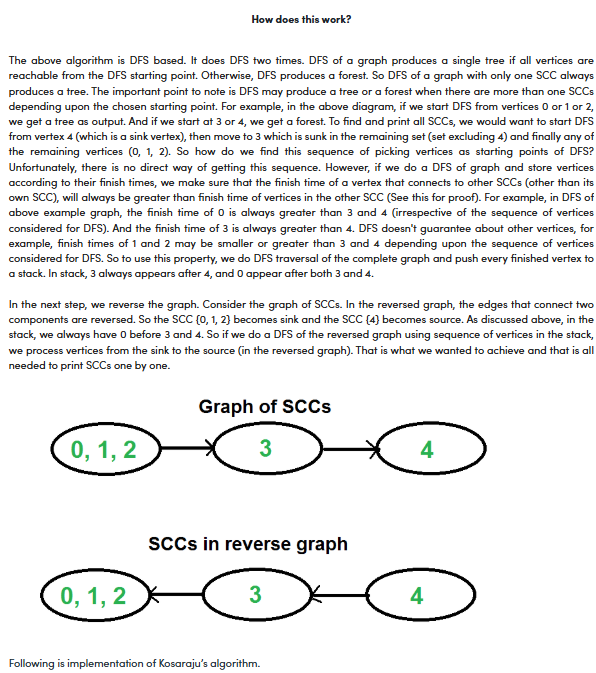

In [17]:
# Python implementation of Kosaraju's algorithm to print all SCCs

from collections import defaultdict

#This class represents a directed graph using adjacency list representation
class Graph:

	def __init__(self,vertices):
		self.V= vertices #No. of vertices
		self.graph = defaultdict(list) # default dictionary to store graph

	# function to add an edge to graph
	def addEdge(self,u,v):
		self.graph[u].append(v)

	# A function used by DFS
	def DFSUtil(self,v,visited):
		# Mark the current node as visited and print it
		visited[v]= True
		print (v),
		#Recur for all the vertices adjacent to this vertex
		for i in self.graph[v]:
			if visited[i]==False:
				self.DFSUtil(i,visited)


	def fillOrder(self,v,visited, stack):
		# Mark the current node as visited
		visited[v]= True
		#Recur for all the vertices adjacent to this vertex
		for i in self.graph[v]:
			if visited[i]==False:
				self.fillOrder(i, visited, stack)
		stack = stack.append(v)


	# Function that returns reverse (or transpose) of this graph
	def getTranspose(self):
		g = Graph(self.V)

		# Recur for all the vertices adjacent to this vertex
		for i in self.graph:
			for j in self.graph[i]:
				g.addEdge(j,i)
		return g



	# The main function that finds and prints all strongly
	# connected components
	def printSCCs(self):

		stack = []
		# Mark all the vertices as not visited (For first DFS)
		visited =[False]*(self.V)
		# Fill vertices in stack according to their finishing
		# times
		for i in range(self.V):
			if visited[i]==False:
				self.fillOrder(i, visited, stack)

		# Create a reversed graph
		gr = self.getTranspose()

		# Mark all the vertices as not visited (For second DFS)
		visited =[False]*(self.V)

		# Now process all vertices in order defined by Stack
		while stack:
			i = stack.pop()
			if visited[i]==False:
				gr.DFSUtil(i, visited)
				print("")

# Create a graph given in the above diagram
g = Graph(5)
g.addEdge(1, 0)
g.addEdge(0, 2)
g.addEdge(2, 1)
g.addEdge(0, 3)
g.addEdge(3, 4)


print ("Following are strongly connected components " +
						"in given graph")
g.printSCCs()

Following are strongly connected components in given graph
0
1
2

3

4



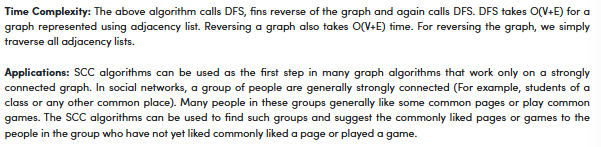

# Bellman-Ford Algorithm for Shortest Path

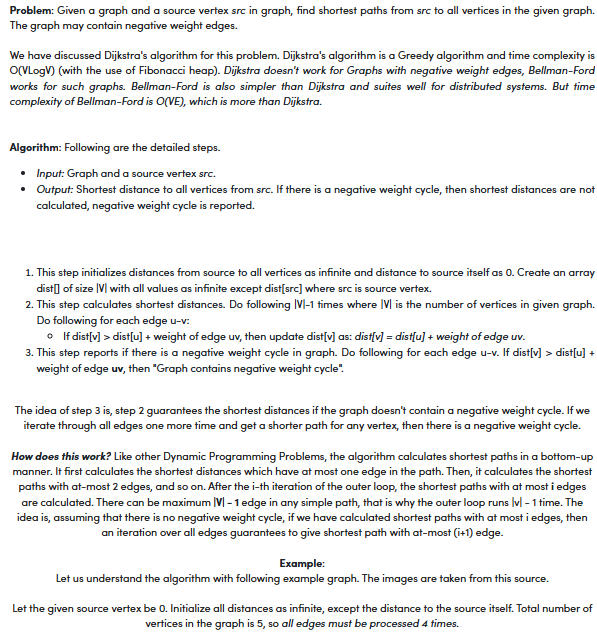

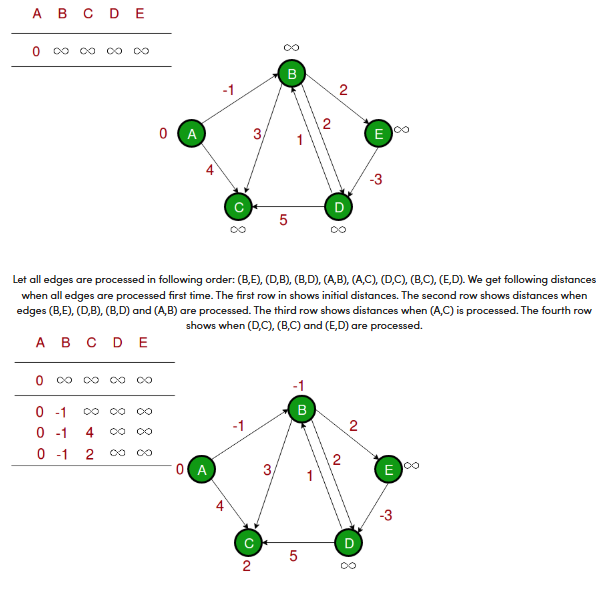

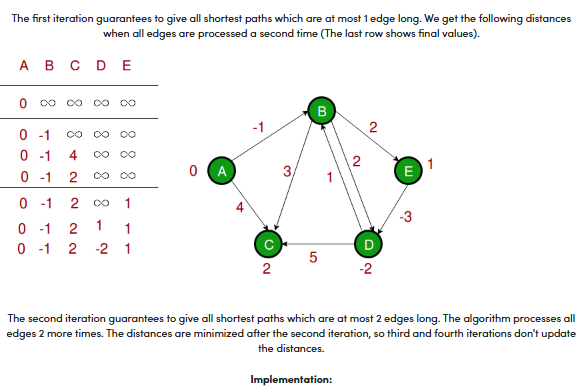

In [18]:
# Python3 program for Bellman-Ford's single source
# shortest path algorithm.

# Class to represent a graph

class Graph:

	def __init__(self, vertices):
		self.V = vertices # No. of vertices
		self.graph = []

	# function to add an edge to graph
	def addEdge(self, u, v, w):
		self.graph.append([u, v, w])

	# utility function used to print the solution
	def printArr(self, dist):
		print("Vertex Distance from Source")
		for i in range(self.V):
			print("{0}\t\t{1}".format(i, dist[i]))

	# The main function that finds shortest distances from src to
	# all other vertices using Bellman-Ford algorithm. The function
	# also detects negative weight cycle
	def BellmanFord(self, src):

		# Step 1: Initialize distances from src to all other vertices
		# as INFINITE
		dist = [float("Inf")] * self.V
		dist[src] = 0

		# Step 2: Relax all edges |V| - 1 times. A simple shortest
		# path from src to any other vertex can have at-most |V| - 1
		# edges
		for _ in range(self.V - 1):
			# Update dist value and parent index of the adjacent vertices of
			# the picked vertex. Consider only those vertices which are still in
			# queue
			for u, v, w in self.graph:
				if dist[u] != float("Inf") and dist[u] + w < dist[v]:
					dist[v] = dist[u] + w

		# Step 3: check for negative-weight cycles. The above step
		# guarantees shortest distances if graph doesn't contain
		# negative weight cycle. If we get a shorter path, then there
		# is a cycle.

		for u, v, w in self.graph:
			if dist[u] != float("Inf") and dist[u] + w < dist[v]:
				print("Graph contains negative weight cycle")
				return

		# print all distance
		self.printArr(dist)


# Driver's code
if __name__ == '__main__':
	g = Graph(5)
	g.addEdge(0, 1, -1)
	g.addEdge(0, 2, 4)
	g.addEdge(1, 2, 3)
	g.addEdge(1, 3, 2)
	g.addEdge(1, 4, 2)
	g.addEdge(3, 2, 5)
	g.addEdge(3, 1, 1)
	g.addEdge(4, 3, -3)

	# function call
	g.BellmanFord(0)

Vertex Distance from Source
0		0
1		-1
2		2
3		-2
4		1


# Important Notes:


Negative weights are found in various applications of graphs. For example, instead of paying the cost for a path, we may get some advantage if we follow the path.

Bellman-Ford works better (better than Dijkstra's) for distributed systems. Unlike Dijkstra's where we need to find the minimum value of all vertices, in Bellman-Ford, edges are considered one by on

# Articulation Points (or Cut Vertices) in a Graph

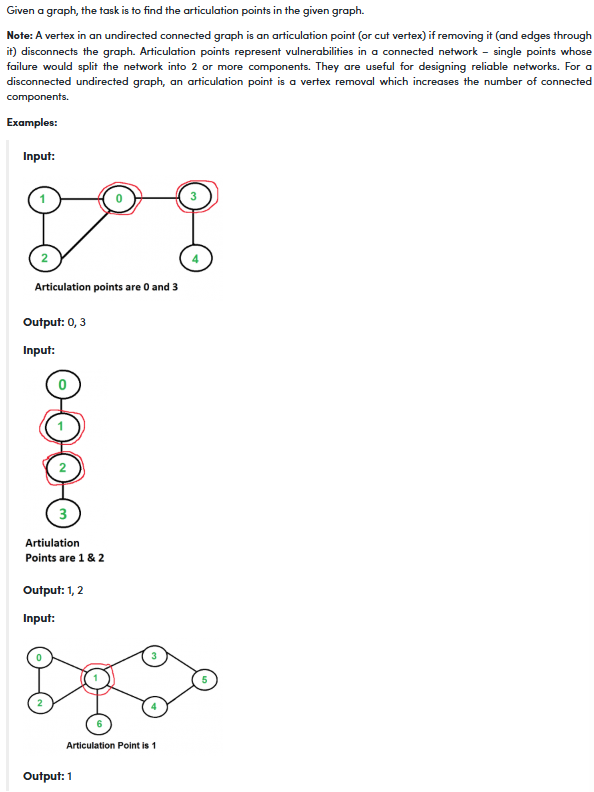

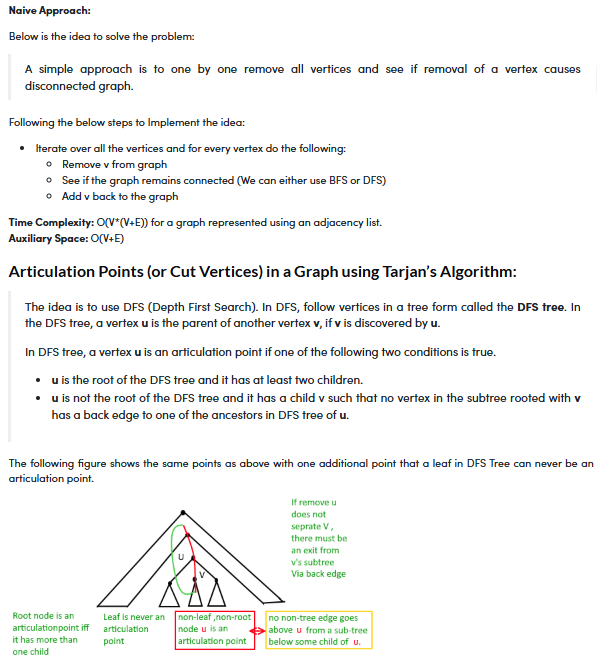

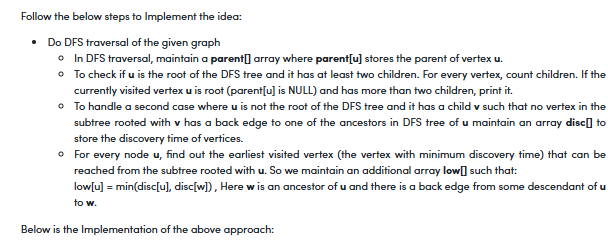

In [19]:
# Python program to find articulation points in an undirected graph

from collections import defaultdict

# This class represents an undirected graph
# using adjacency list representation
class Graph:

    def __init__(self, vertices):
        self.V = vertices # No. of vertices
        self.graph = defaultdict(list) # default dictionary to store graph
        self.Time = 0

    # function to add an edge to graph
    def addEdge(self, u, v):
        self.graph[u].append(v)
        self.graph[v].append(u)

    '''A recursive function that find articulation points
    using DFS traversal
    u --> The vertex to be visited next
    visited[] --> keeps track of visited vertices
    disc[] --> Stores discovery times of visited vertices
    parent[] --> Stores parent vertices in DFS tree
    ap[] --> Store articulation points'''
    def APUtil(self, u, visited, ap, parent, low, disc):

        # Count of children in current node
        children = 0

        # Mark the current node as visited and print it
        visited[u]= True

        # Initialize discovery time and low value
        disc[u] = self.Time
        low[u] = self.Time
        self.Time += 1

        # Recur for all the vertices adjacent to this vertex
        for v in self.graph[u]:
            # If v is not visited yet, then make it a child of u
            # in DFS tree and recur for it
            if visited[v] == False :
                parent[v] = u
                children += 1
                self.APUtil(v, visited, ap, parent, low, disc)

                # Check if the subtree rooted with v has a connection to
                # one of the ancestors of u
                low[u] = min(low[u], low[v])

                # u is an articulation point in following cases
                # (1) u is root of DFS tree and has two or more children.
                if parent[u] == -1 and children > 1:
                    ap[u] = True

                #(2) If u is not root and low value of one of its child is more
                # than discovery value of u.
                if parent[u] != -1 and low[v] >= disc[u]:
                    ap[u] = True

                # Update low value of u for parent function calls
            elif v != parent[u]:
                low[u] = min(low[u], disc[v])


    # The function to do DFS traversal. It uses recursive APUtil()
    def AP(self):

        # Mark all the vertices as not visited
        # and Initialize parent and visited,
        # and ap(articulation point) arrays
        visited = [False] * (self.V)
        disc = [float("Inf")] * (self.V)
        low = [float("Inf")] * (self.V)
        parent = [-1] * (self.V)
        ap = [False] * (self.V) # To store articulation points

        # Call the recursive helper function
        # to find articulation points
        # in DFS tree rooted with vertex 'i'
        for i in range(self.V):
            if visited[i] == False:
                self.APUtil(i, visited, ap, parent, low, disc)

        for index, value in enumerate (ap):
            if value == True: print (index,end=" ")

 # Create a graph given in the above diagram
g1 = Graph(5)
g1.addEdge(1, 0)
g1.addEdge(0, 2)
g1.addEdge(2, 1)
g1.addEdge(0, 3)
g1.addEdge(3, 4)

print ("\nArticulation points in first graph ")
g1.AP()

g2 = Graph(4)
g2.addEdge(0, 1)
g2.addEdge(1, 2)
g2.addEdge(2, 3)
print ("\nArticulation points in second graph ")
g2.AP()


g3 = Graph (7)
g3.addEdge(0, 1)
g3.addEdge(1, 2)
g3.addEdge(2, 0)
g3.addEdge(1, 3)
g3.addEdge(1, 4)
g3.addEdge(1, 6)
g3.addEdge(3, 5)
g3.addEdge(4, 5)
print ("\nArticulation points in third graph ")
g3.AP()



Articulation points in first graph 
0 3 
Articulation points in second graph 
1 2 
Articulation points in third graph 
1 

**Time Complexity: O(V+E)**, For DFS it takes O(V+E) time.


**Auxiliary Space: O(V+E)**, For visited array, adjacency list array.

# Bridges in a graph

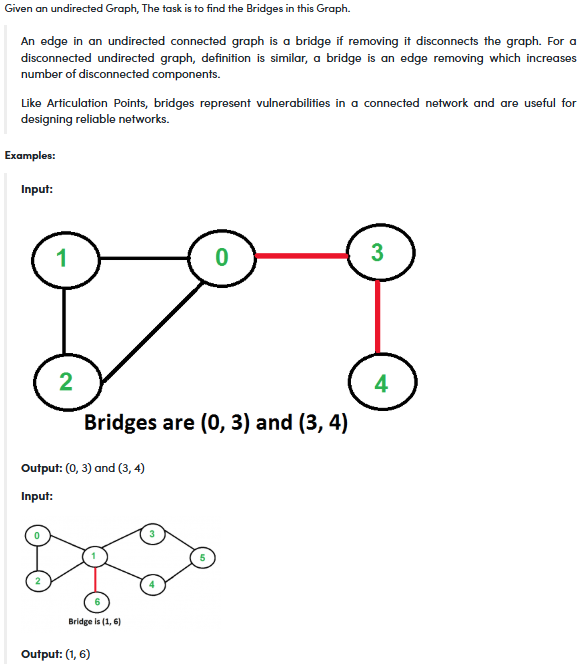

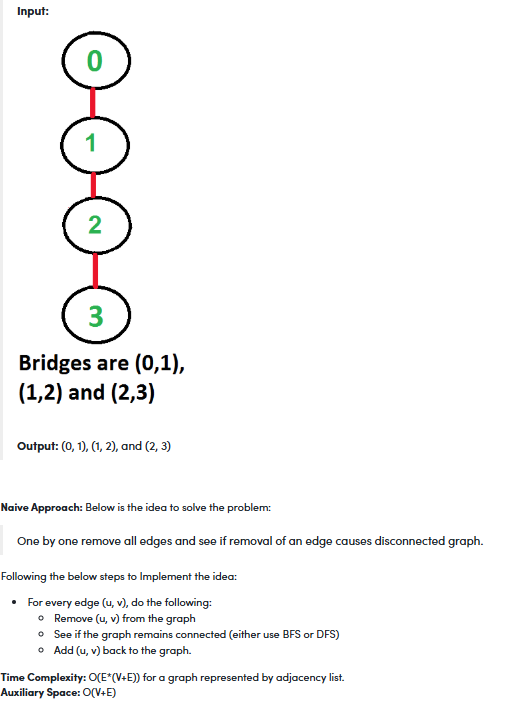

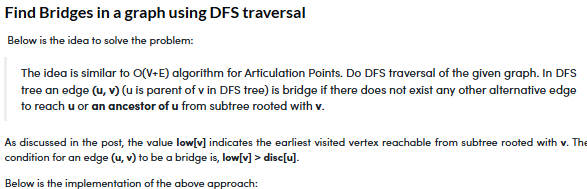

In [20]:
# Python program to find bridges in a given undirected graph
#Complexity : O(V+E)

from collections import defaultdict

#This class represents an undirected graph using adjacency list representation
class Graph:

    def __init__(self,vertices):
        self.V= vertices #No. of vertices
        self.graph = defaultdict(list) # default dictionary to store graph
        self.Time = 0

    # function to add an edge to graph
    def addEdge(self,u,v):
        self.graph[u].append(v)
        self.graph[v].append(u)

    '''A recursive function that finds and prints bridges
    using DFS traversal
    u --> The vertex to be visited next
    visited[] --> keeps track of visited vertices
    disc[] --> Stores discovery times of visited vertices
    parent[] --> Stores parent vertices in DFS tree'''
    def bridgeUtil(self,u, visited, parent, low, disc):

        # Mark the current node as visited and print it
        visited[u]= True

        # Initialize discovery time and low value
        disc[u] = self.Time
        low[u] = self.Time
        self.Time += 1

        #Recur for all the vertices adjacent to this vertex
        for v in self.graph[u]:
            # If v is not visited yet, then make it a child of u
            # in DFS tree and recur for it
            if visited[v] == False :
                parent[v] = u
                self.bridgeUtil(v, visited, parent, low, disc)

                # Check if the subtree rooted with v has a connection to
                # one of the ancestors of u
                low[u] = min(low[u], low[v])


                ''' If the lowest vertex reachable from subtree
                under v is below u in DFS tree, then u-v is
                a bridge'''
                if low[v] > disc[u]:
                    print ("%d %d" %(u,v))


            elif v != parent[u]: # Update low value of u for parent function calls.
                low[u] = min(low[u], disc[v])


    # DFS based function to find all bridges. It uses recursive
    # function bridgeUtil()
    def bridge(self):

        # Mark all the vertices as not visited and Initialize parent and visited,
        # and ap(articulation point) arrays
        visited = [False] * (self.V)
        disc = [float("Inf")] * (self.V)
        low = [float("Inf")] * (self.V)
        parent = [-1] * (self.V)

        # Call the recursive helper function to find bridges
        # in DFS tree rooted with vertex 'i'
        for i in range(self.V):
            if visited[i] == False:
                self.bridgeUtil(i, visited, parent, low, disc)


# Create a graph given in the above diagram
g1 = Graph(5)
g1.addEdge(1, 0)
g1.addEdge(0, 2)
g1.addEdge(2, 1)
g1.addEdge(0, 3)
g1.addEdge(3, 4)


print ("Bridges in first graph ")
g1.bridge()

g2 = Graph(4)
g2.addEdge(0, 1)
g2.addEdge(1, 2)
g2.addEdge(2, 3)
print ("\nBridges in second graph ")
g2.bridge()


g3 = Graph (7)
g3.addEdge(0, 1)
g3.addEdge(1, 2)
g3.addEdge(2, 0)
g3.addEdge(1, 3)
g3.addEdge(1, 4)
g3.addEdge(1, 6)
g3.addEdge(3, 5)
g3.addEdge(4, 5)
print ("\nBridges in third graph ")
g3.bridge()


Bridges in first graph 
3 4
0 3

Bridges in second graph 
2 3
1 2
0 1

Bridges in third graph 
1 6


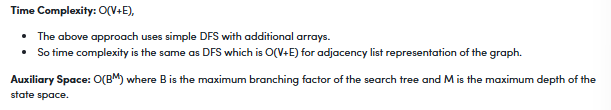

# Tarjan's Algorithm

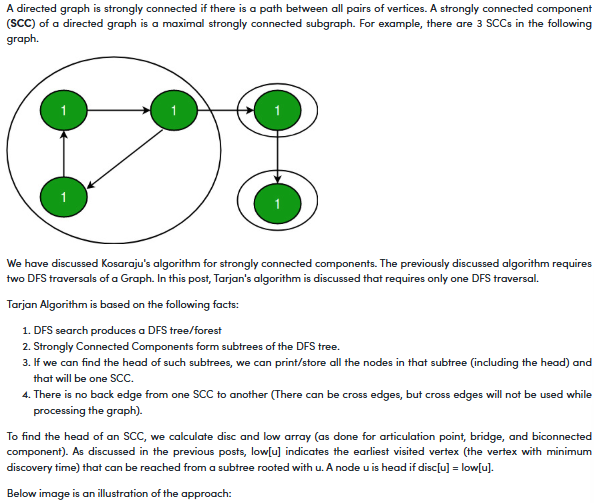

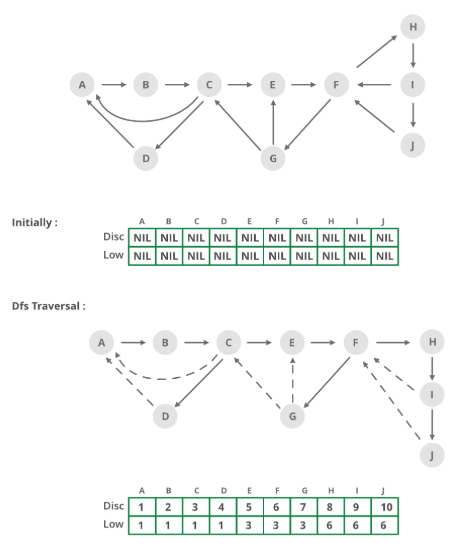

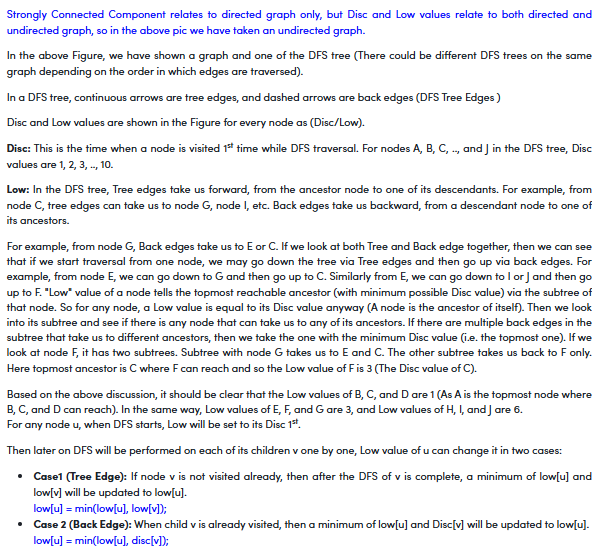

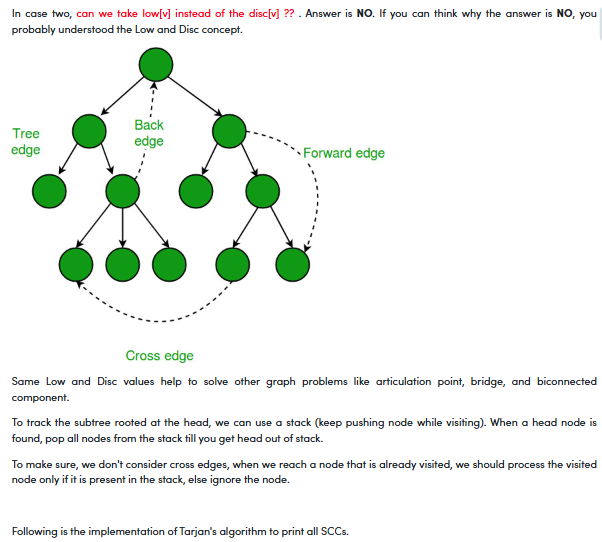

In [21]:
# Python program to find strongly connected components in a given
# directed graph using Tarjan's algorithm (single DFS)
#Complexity : O(V+E)

from collections import defaultdict

#This class represents an directed graph
# using adjacency list representation
class Graph:

    def __init__(self,vertices):
        #No. of vertices
        self.V= vertices

        # default dictionary to store graph
        self.graph = defaultdict(list)

        self.Time = 0

    # function to add an edge to graph
    def addEdge(self,u,v):
        self.graph[u].append(v)


    '''A recursive function that find finds and prints strongly connected
    components using DFS traversal
    u --> The vertex to be visited next
    disc[] --> Stores discovery times of visited vertices
    low[] -- >> earliest visited vertex (the vertex with minimum
                discovery time) that can be reached from subtree
                rooted with current vertex
     st -- >> To store all the connected ancestors (could be part
           of SCC)
     stackMember[] --> bit/index array for faster check whether
                  a node is in stack
    '''
    def SCCUtil(self,u, low, disc, stackMember, st):

        # Initialize discovery time and low value
        disc[u] = self.Time
        low[u] = self.Time
        self.Time += 1
        stackMember[u] = True
        st.append(u)

        # Go through all vertices adjacent to this
        for v in self.graph[u]:

            # If v is not visited yet, then recur for it
            if disc[v] == -1 :

                self.SCCUtil(v, low, disc, stackMember, st)

                # Check if the subtree rooted with v has a connection to
                # one of the ancestors of u
                # Case 1 (per above discussion on Disc and Low value)
                low[u] = min(low[u], low[v])

            elif stackMember[v] == True:

                '''Update low value of 'u' only if 'v' is still in stack
                (i.e. it's a back edge, not cross edge).
                Case 2 (per above discussion on Disc and Low value) '''
                low[u] = min(low[u], disc[v])

        # head node found, pop the stack and print an SCC
        w = -1 #To store stack extracted vertices
        if low[u] == disc[u]:
            while w != u:
                w = st.pop()
                print (w, end=" ")
                stackMember[w] = False

            print()



    #The function to do DFS traversal.
    # It uses recursive SCCUtil()
    def SCC(self):

        # Mark all the vertices as not visited
        # and Initialize parent and visited,
        # and ap(articulation point) arrays
        disc = [-1] * (self.V)
        low = [-1] * (self.V)
        stackMember = [False] * (self.V)
        st =[]


        # Call the recursive helper function
        # to find articulation points
        # in DFS tree rooted with vertex 'i'
        for i in range(self.V):
            if disc[i] == -1:
                self.SCCUtil(i, low, disc, stackMember, st)





# Create a graph given in the above diagram
g1 = Graph(5)
g1.addEdge(1, 0)
g1.addEdge(0, 2)
g1.addEdge(2, 1)
g1.addEdge(0, 3)
g1.addEdge(3, 4)
print ("SSC in first graph ")
g1.SCC()

g2 = Graph(4)
g2.addEdge(0, 1)
g2.addEdge(1, 2)
g2.addEdge(2, 3)
print ("nSSC in second graph ")
g2.SCC()


g3 = Graph(7)
g3.addEdge(0, 1)
g3.addEdge(1, 2)
g3.addEdge(2, 0)
g3.addEdge(1, 3)
g3.addEdge(1, 4)
g3.addEdge(1, 6)
g3.addEdge(3, 5)
g3.addEdge(4, 5)
print ("nSSC in third graph ")
g3.SCC()

g4 = Graph(11)
g4.addEdge(0, 1)
g4.addEdge(0, 3)
g4.addEdge(1, 2)
g4.addEdge(1, 4)
g4.addEdge(2, 0)
g4.addEdge(2, 6)
g4.addEdge(3, 2)
g4.addEdge(4, 5)
g4.addEdge(4, 6)
g4.addEdge(5, 6)
g4.addEdge(5, 7)
g4.addEdge(5, 8)
g4.addEdge(5, 9)
g4.addEdge(6, 4)
g4.addEdge(7, 9)
g4.addEdge(8, 9)
g4.addEdge(9, 8)
print ("nSSC in fourth graph ")
g4.SCC();


g5 = Graph (5)
g5.addEdge(0, 1)
g5.addEdge(1, 2)
g5.addEdge(2, 3)
g5.addEdge(2, 4)
g5.addEdge(3, 0)
g5.addEdge(4, 2)
print ("nSSC in fifth graph ")
g5.SCC();

#This code is contributed by Neelam Yadav

SSC in first graph 
4 
3 
1 2 0 
nSSC in second graph 
3 
2 
1 
0 
nSSC in third graph 
5 
3 
4 
6 
2 1 0 
nSSC in fourth graph 
8 9 
7 
5 4 6 
3 2 1 0 
10 
nSSC in fifth graph 
4 3 2 1 0 


**Time Complexity:** The above algorithm mainly calls DFS, DFS takes O(V+E) for a graph represented using an adjacency list.

# Kruskal's **Algorithm**

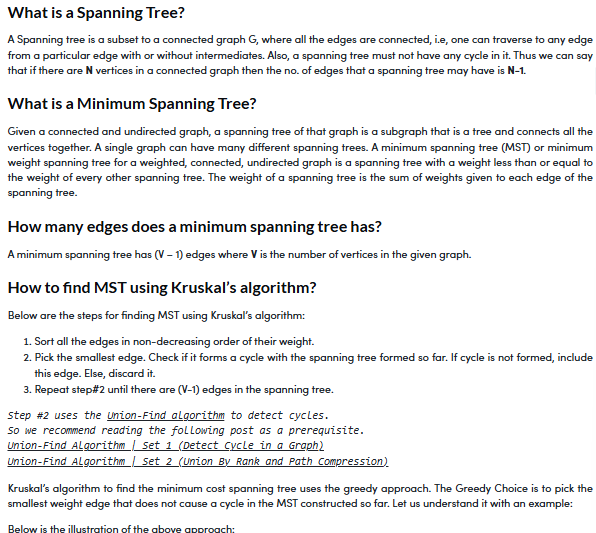

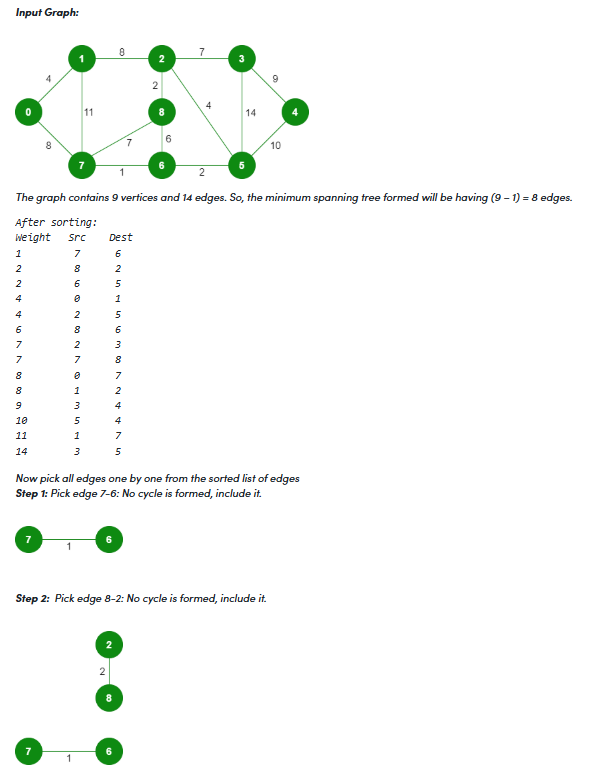

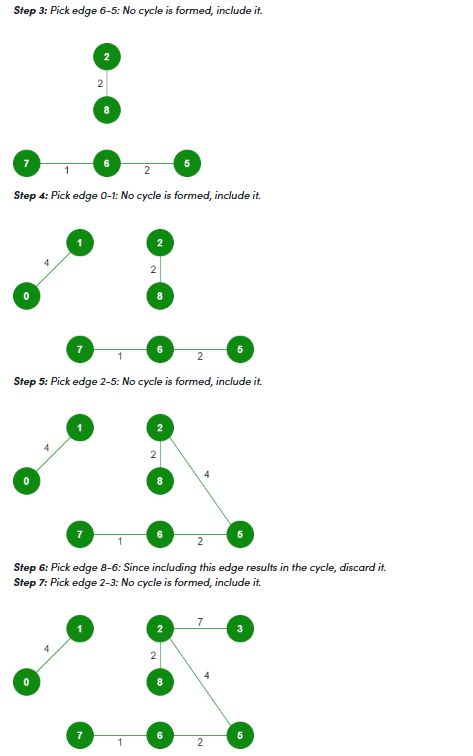

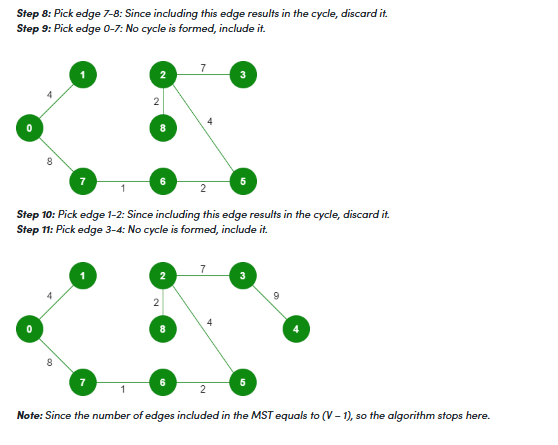

In [22]:
# Python program for Kruskal's algorithm to find
# Minimum Spanning Tree of a given connected,
# undirected and weighted graph

# Class to represent a graph


class Graph:

	def __init__(self, vertices):
		self.V = vertices # No. of vertices
		self.graph = []
		# to store graph

	# function to add an edge to graph
	def addEdge(self, u, v, w):
		self.graph.append([u, v, w])

	# A utility function to find set of an element i
	# (truly uses path compression technique)
	def find(self, parent, i):
		if parent[i] != i:
		# Reassignment of node's parent to root node as
		# path compression requires
			parent[i] = self.find(parent, parent[i])
		return parent[i]

	# A function that does union of two sets of x and y
	# (uses union by rank)
	def union(self, parent, rank, x, y):

		# Attach smaller rank tree under root of
		# high rank tree (Union by Rank)
		if rank[x] < rank[y]:
			parent[x] = y
		elif rank[x] > rank[y]:
			parent[y] = x

		# If ranks are same, then make one as root
		# and increment its rank by one
		else:
			parent[y] = x
			rank[x] += 1

	# The main function to construct MST using Kruskal's
		# algorithm
	def KruskalMST(self):

		result = [] # This will store the resultant MST

		# An index variable, used for sorted edges
		i = 0

		# An index variable, used for result[]
		e = 0

		# Step 1: Sort all the edges in
		# non-decreasing order of their
		# weight. If we are not allowed to change the
		# given graph, we can create a copy of graph
		self.graph = sorted(self.graph,
							key=lambda item: item[2])

		parent = []
		rank = []

		# Create V subsets with single elements
		for node in range(self.V):
			parent.append(node)
			rank.append(0)

		# Number of edges to be taken is equal to V-1
		while e < self.V - 1:

			# Step 2: Pick the smallest edge and increment
			# the index for next iteration
			u, v, w = self.graph[i]
			i = i + 1
			x = self.find(parent, u)
			y = self.find(parent, v)

			# If including this edge doesn't
			# cause cycle, then include it in result
			# and increment the index of result
			# for next edge
			if x != y:
				e = e + 1
				result.append([u, v, w])
				self.union(parent, rank, x, y)
			# Else discard the edge

		minimumCost = 0
		print("Edges in the constructed MST")
		for u, v, weight in result:
			minimumCost += weight
			print("%d -- %d == %d" % (u, v, weight))
		print("Minimum Spanning Tree", minimumCost)


# Driver's code
if __name__ == '__main__':
	g = Graph(4)
	g.addEdge(0, 1, 10)
	g.addEdge(0, 2, 6)
	g.addEdge(0, 3, 5)
	g.addEdge(1, 3, 15)
	g.addEdge(2, 3, 4)

	# Function call
	g.KruskalMST()

Edges in the constructed MST
2 -- 3 == 4
0 -- 3 == 5
0 -- 1 == 10
Minimum Spanning Tree 19


**Time Complexity:** O(ElogE) or O(ElogV), Sorting of edges takes O(ELogE) time. After sorting, we iterate through all edges and apply the find-union algorithm. The find and union operations can take at most O(LogV) time. So overall complexity is O(ELogE + ELogV) time. The value of E can be at most O(V2), so O(LogV) is O(LogE) the same. Therefore, the overall time complexity is O(ElogE) or O(ElogV)


**Auxiliary Space:** O(V + E), where V is the number of vertices and E is the number of edges in the graph